# Comprehensive PageRank Strategy Performance Analyzer & Optimization Framework

📁 Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully!
🌐 Loading original network graph...
📊 Original network loaded: 122066 edges, 1841 pages
✅ Loaded from: /content/drive/MyDrive/WebKnoGraph/initial_thoughts/link_graph_edges.csv
📈 Loading network effects data...
✅ Network effects data loaded: 50 experiments
   Columns: ['Experiment type', 'Batch', 'Mean overall delta', 'Std dev overall delta', 'Mean delta percentage', 'Std dev delta percentage', 'Positive outcomes', 'Negative outcomes', 'Neutral outcomes', 'Average up', 'Average down', 'Average unchanged']
🚀 Step 1: Processing all strategy files with URL-level analysis...
🚀 Starting comprehensive network ranking analysis...
📁 Base path: /content/drive/MyDrive/WebKnoGraph/initial_thoughts/automatic_led
🎯 Strategy types: best_batches, worst_batches, folder_batches, mixed_batches, random_batches

📊 Pr

/tmp/ipython-input-148467324.py:1823: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax5.boxplot(correlation_data, labels=labels, patch_artist=True)
/tmp/ipython-input-148467324.py:1997: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax5.boxplot(correlation_data, labels=labels, patch_artist=True)
/tmp/ipython-input-148467324.py:1107: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax3.boxplot(consistency_data, labels=labels, patch_artist=True)
/tmp/ipython-input-148467324.py:1650: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Liberation Sans.
  plt.tight_layout()


✅ Created comprehensive visualizations:
   📊 Batch-level analysis: 5 strategies
   📄 Individual file analysis: 50 files
   🔗 URL-level analysis: 14318 URL impacts

🎯 Step 3: Generating strategic insights with concrete recommendations...

🎯 COMPREHENSIVE NETWORK RANKING STRATEGY INSIGHTS
Strategic Analysis & Performance Optimization Recommendations

🏆 STRATEGY PERFORMANCE RANKINGS:

#1 - 🎯 BEST BATCHES STRATEGY
   📊 Files Analyzed: 10
   🎯 Rank Preservation Score: 0.9892

   📈 CORRELATION METRICS:
      • Kendall's τ: 0.9791 ± 0.0008
      • Spearman's ρ: 0.9988 ± 0.0000
      • Rank-Biased Overlap: 1.0000 ± 0.0000

   🎯 IMPACT METRICS:
      • Total Pages Improved: 6499
      • Average Pages Improved per File: 650
      • Jensen-Shannon Distance: 0.0081
      • Top-10 Jaccard Similarity: 1.0000

   ⚡ EFFICIENCY METRICS:
      • Efficiency Score: 122.12
      • Network Impact Score: 649.90
   🏷️  Performance Rating: 🥇 EXCELLENT - Outstanding rank preservation

#2 - 🎯 MIXED BATCHES STRAT

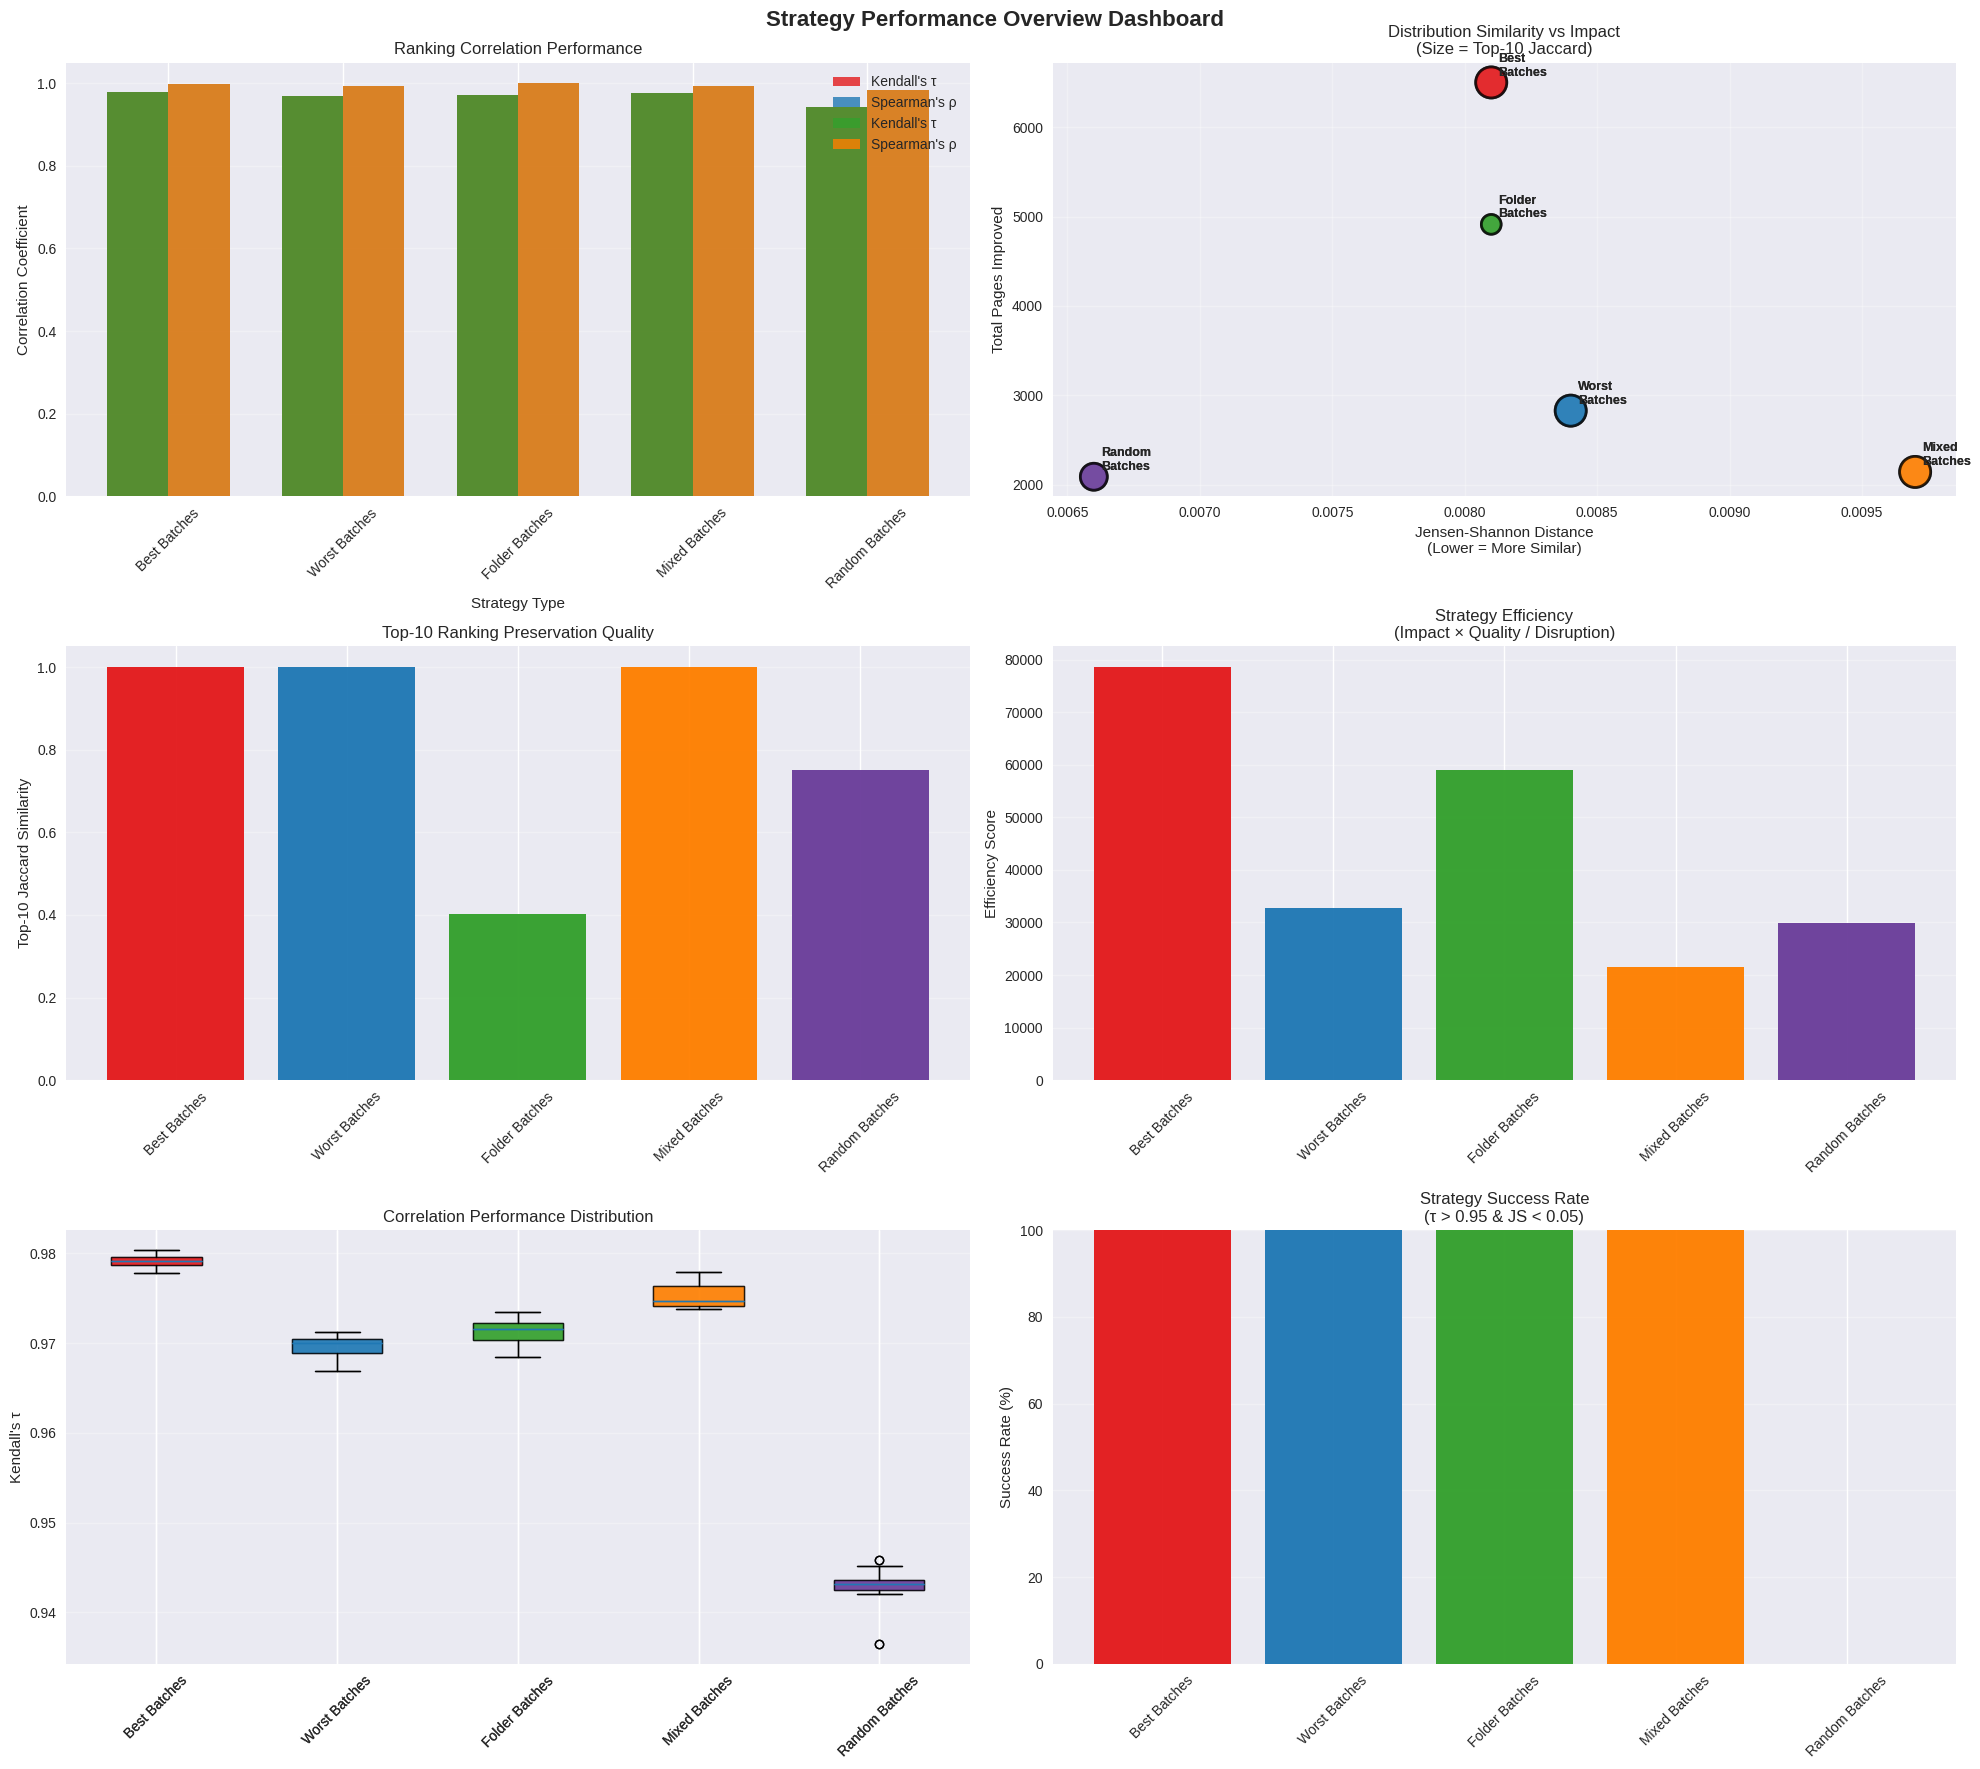

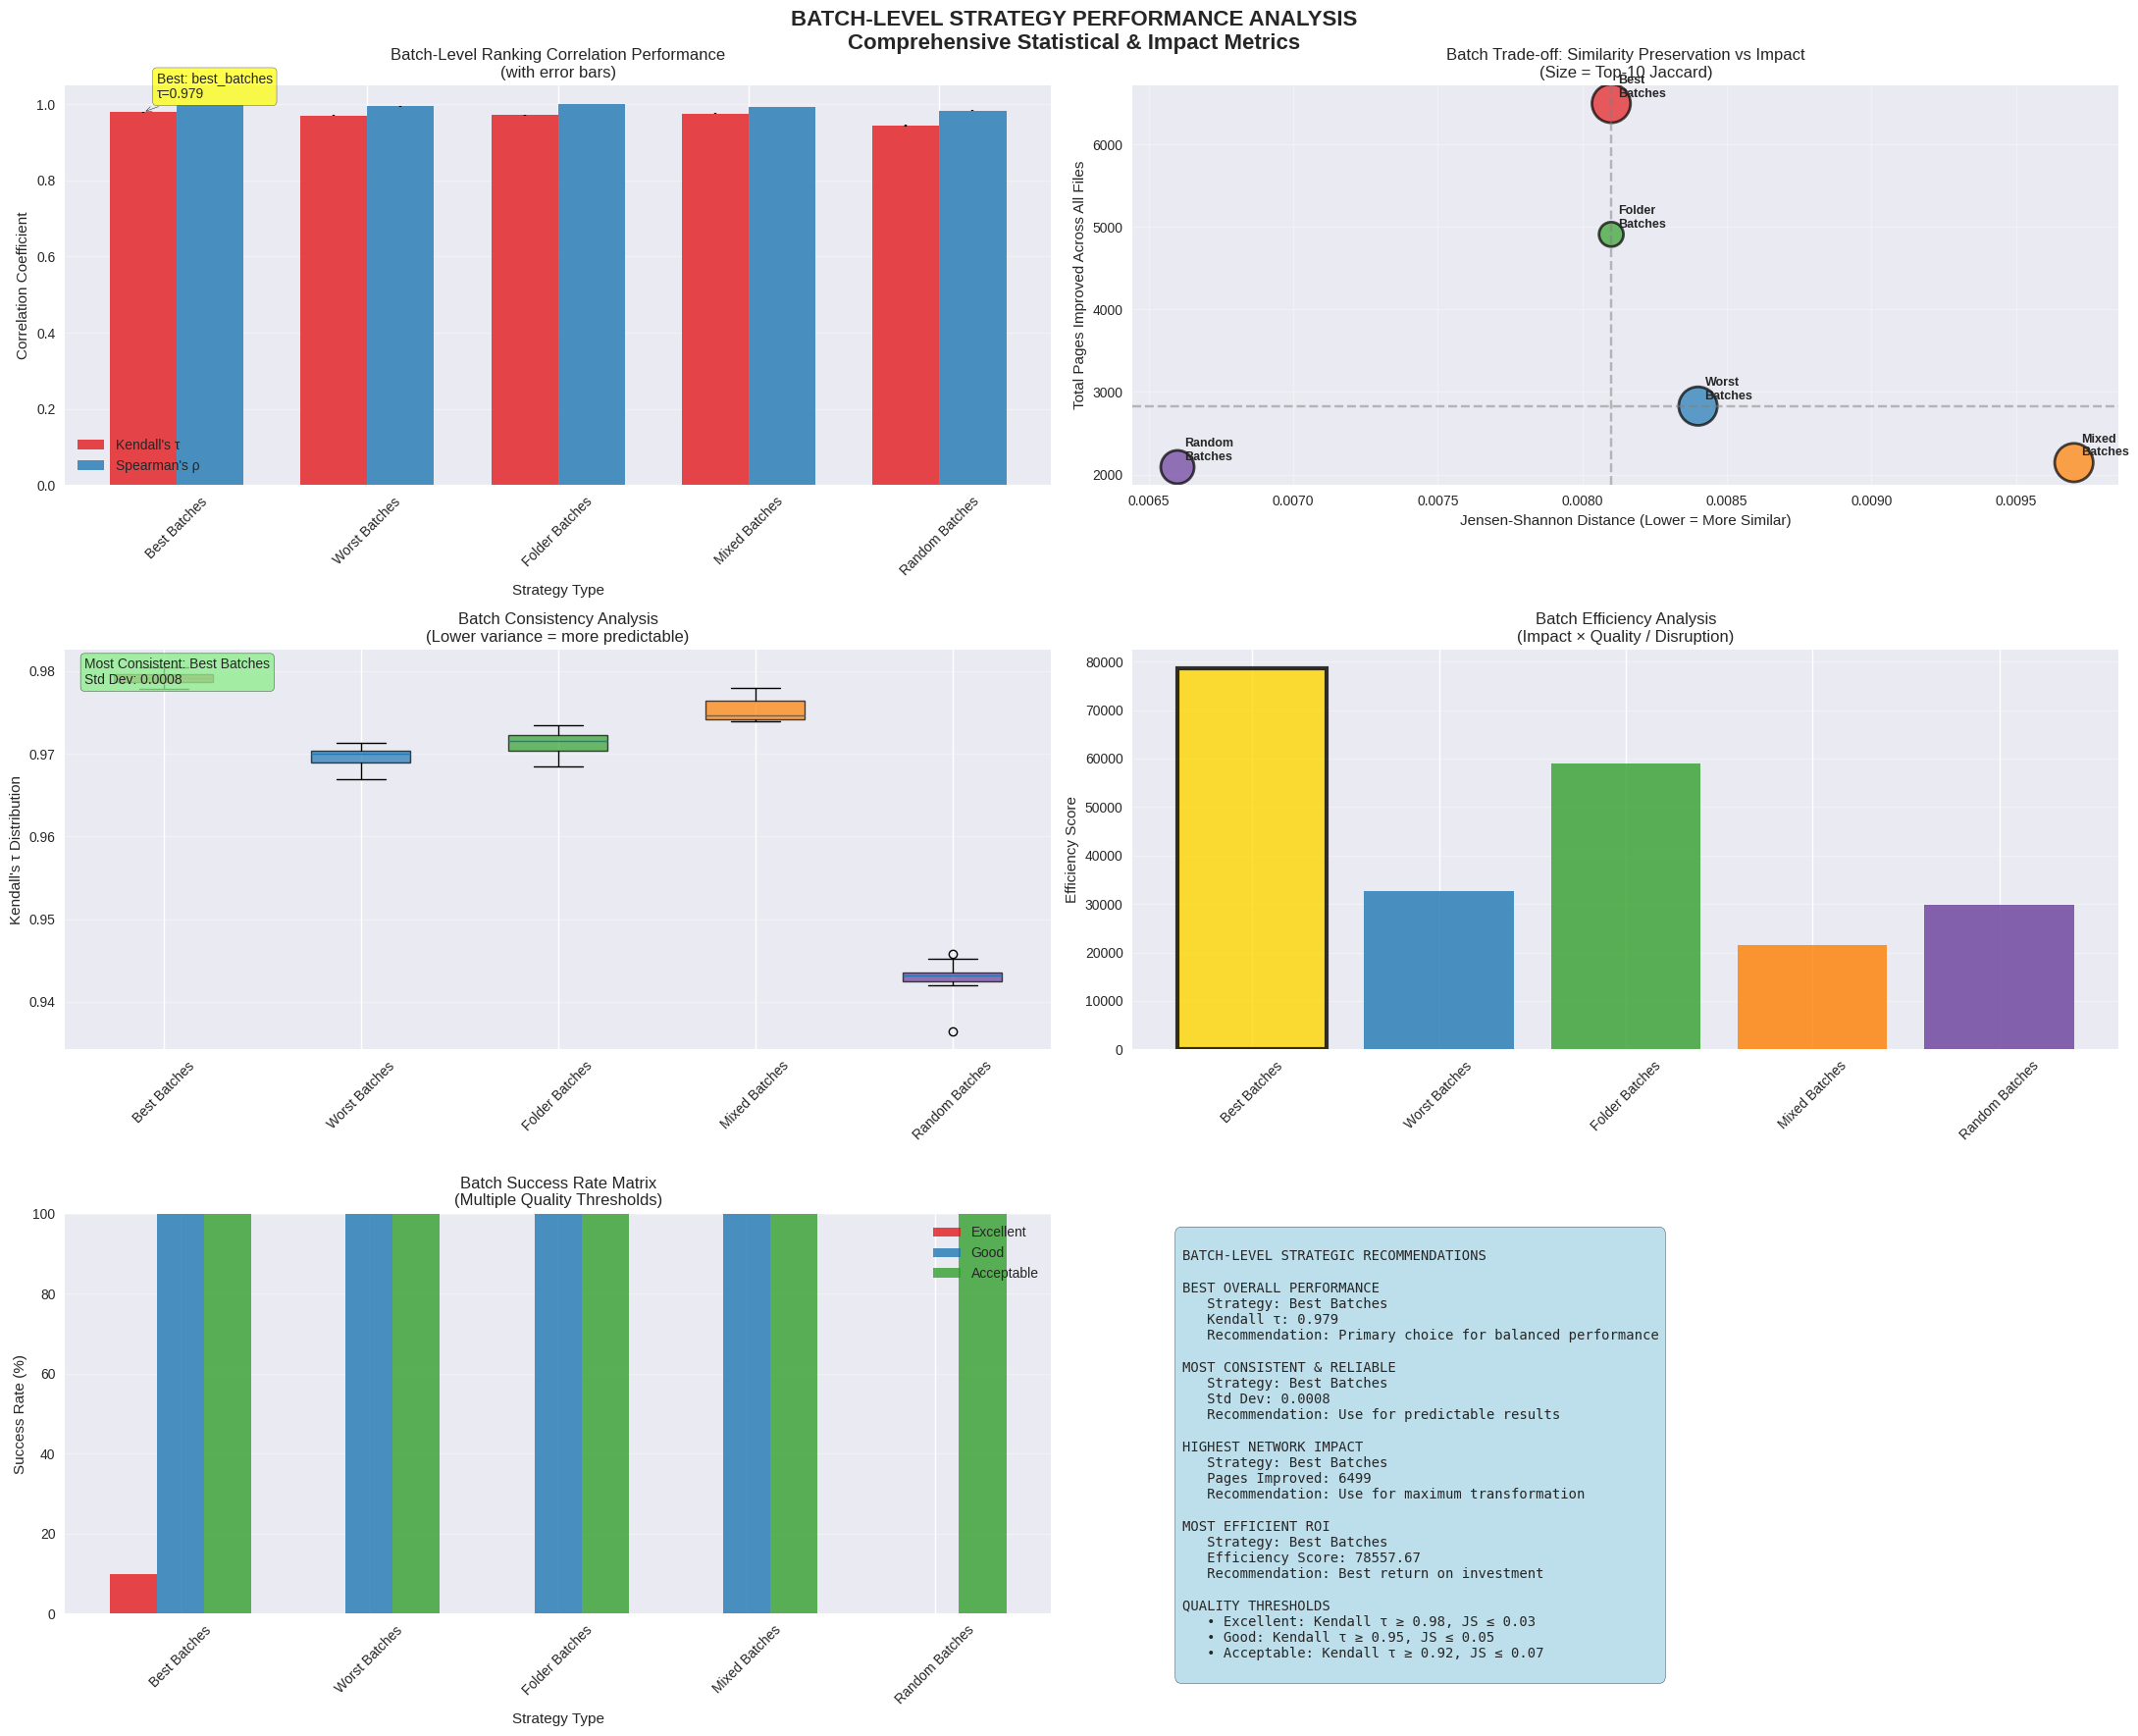

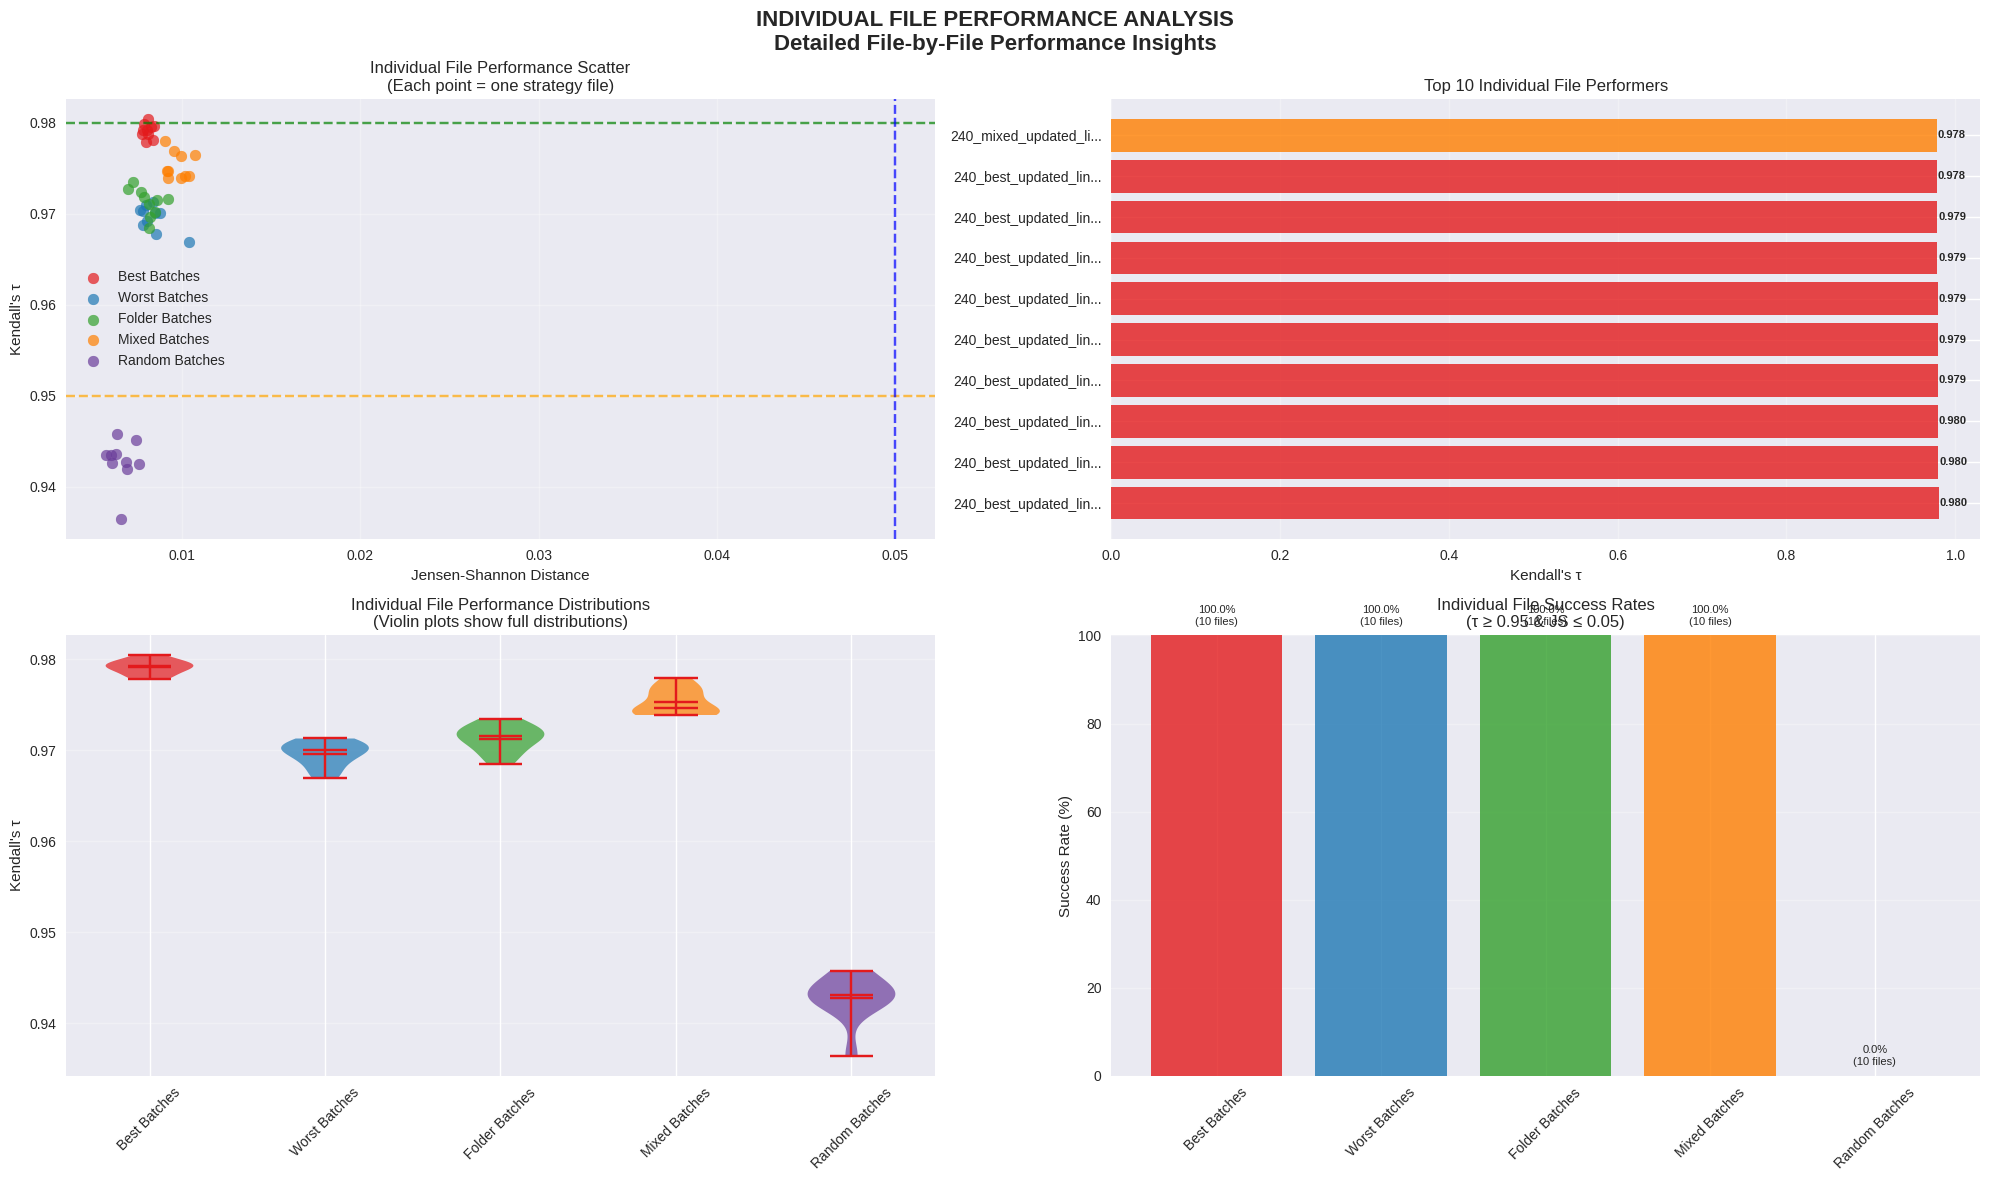

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8310 (\N{SUPERSCRIPT SIX}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


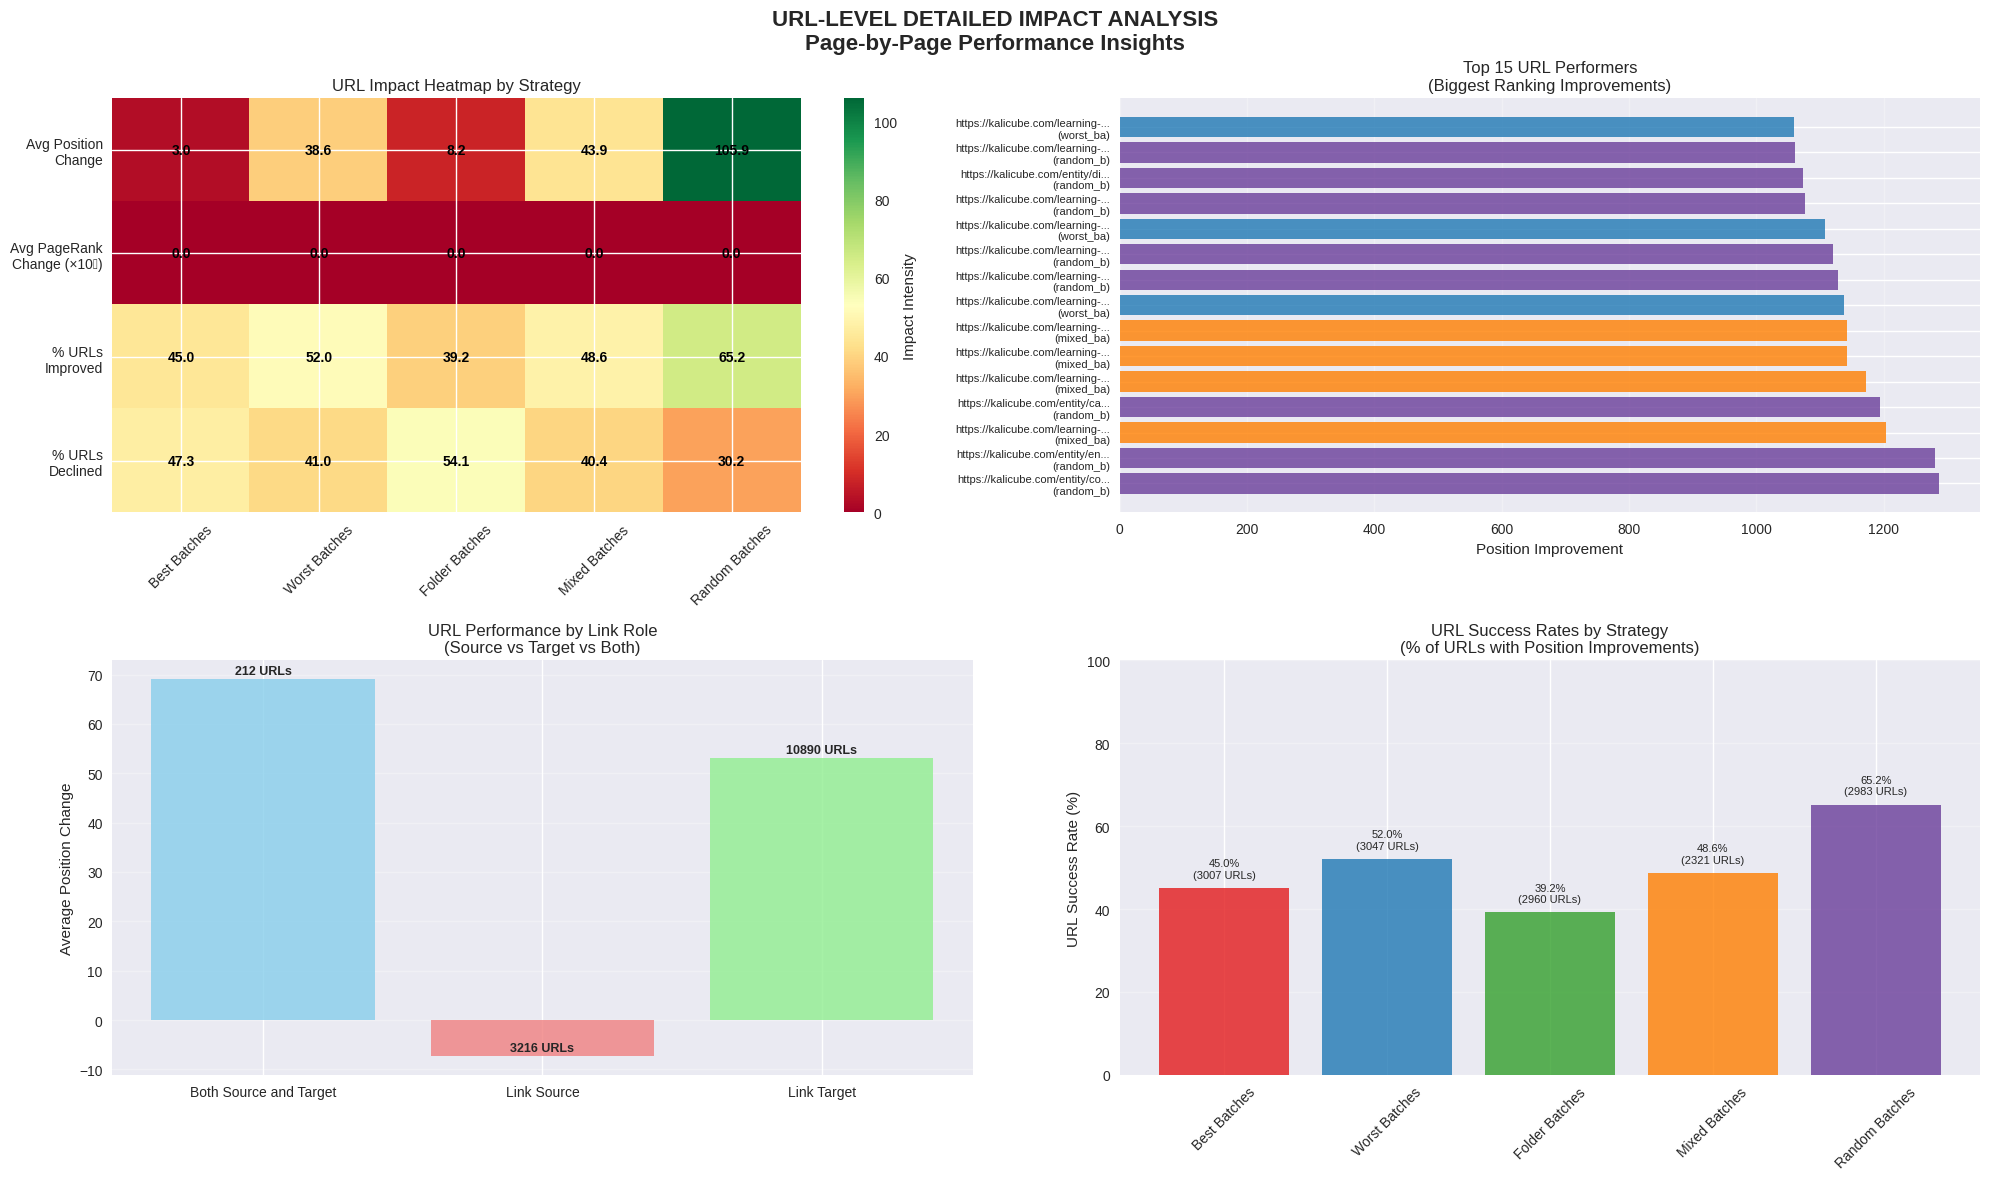

   📄 Showing Individual File Performance Analysis...
   🔗 Showing URL-Level Detailed Impact Analysis...

🎉 COMPREHENSIVE NETWORK RANKING ANALYSIS WITH URL DRILLDOWN COMPLETE!
📊 Successfully analyzed 50 strategy files
🎯 Best performing strategy: Best Batches
🔗 URL-level impacts analyzed: 14318 changed link records
🌐 Graph-wide impacts analyzed: 92050 page records
📁 Results with URL drilldown saved to: comprehensive_network_ranking_analysis_with_url_drilldown_20250801_222325.xlsx

CONCRETE STRATEGIC RECOMMENDATIONS SUMMARY

🥇 PRIMARY RECOMMENDATION: Best Batches
   → Performance: Kendall τ = 0.979
   → Consistency: ±0.001
   → Total Impact: 6499 pages improved
   → Use when: You need the best overall balance of performance and reliability

🔒 BACKUP RECOMMENDATION: Best Batches
   → Consistency: ±0.001 (most predictable)
   → Performance: Kendall τ = 0.979
   → Use when: Predictable, consistent results are critical

💥 MAXIMUM IMPACT RECOMMENDATION: Best Batches
   → Network Impact: 6499 t

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.spatial.distance import jensenshannon
import os
from datetime import datetime
import json
from google.colab import drive

# Import or implement Wasserstein distance
try:
    from scipy.stats import wasserstein_distance
except ImportError:

    def wasserstein_distance(u_values, v_values):
        """Simple implementation of 1D Wasserstein distance"""
        u_values = np.asarray(u_values)
        v_values = np.asarray(v_values)
        u_sorted = np.sort(u_values)
        v_sorted = np.sort(v_values)
        max_len = max(len(u_sorted), len(v_sorted))
        u_padded = np.pad(u_sorted, (0, max_len - len(u_sorted)), "constant")
        v_padded = np.pad(v_sorted, (0, max_len - len(v_sorted)), "constant")
        return np.mean(np.abs(u_padded - v_padded))


# Visualization settings
plt.style.use("seaborn-v0_8")
STRATEGY_COLORS = ["#E31A1C", "#1F78B4", "#33A02C", "#FF7F00", "#6A3D9A", "#B15928"]
sns.set_palette(STRATEGY_COLORS)


class ComprehensiveNetworkRankingAnalyzer:
    """
    Comprehensive analyzer for PageRank strategy evaluation combining:
    - Statistical correlation metrics (Kendall's tau, Spearman's rho, Pearson)
    - Distribution similarity measures (Jensen-Shannon, KL divergence, Wasserstein)
    - Ranking quality metrics (Top-K precision/recall, Rank-Biased Overlap)
    - Network impact analysis (disruption vs preservation trade-offs)
    - Page-level detailed impact assessment
    - Strategic recommendations and optimization insights
    """

    def __init__(self, original_graph_file, network_effects_file=None):
        self.original_graph_file = original_graph_file
        self.network_effects_file = network_effects_file

        # Core graph data
        self.original_pagerank = None
        self.original_graph = None
        self.original_edges_df = None
        self.original_page_rankings = None

        # Analysis results storage
        self.strategy_performance_metrics = []  # Statistical metrics per file
        self.page_level_link_impacts = []  # Impact on pages with changed links
        self.page_level_graph_impacts = []  # Impact on all pages in graph
        self.strategy_file_summaries = []  # High-level summary per file
        self.network_effects_data = None

        # Configuration
        self.drive_base_path = (
            "/content/drive/MyDrive/WebKnoGraph/initial_thoughts/automatic_led"
        )
        self.strategy_folder_names = [
            "best_batches",
            "worst_batches",
            "folder_batches",
            "mixed_batches",
            "random_batches",
        ]

        # Initialize
        self._mount_google_drive()
        self._load_original_network()
        if network_effects_file:
            self._load_network_effects_data()

    def _mount_google_drive(self):
        """Mount Google Drive for accessing data files"""
        print("📁 Mounting Google Drive...")
        drive.mount("/content/drive")
        print("✅ Google Drive mounted successfully!")

    def _load_original_network(self):
        """Load the original network graph and calculate baseline PageRank"""
        print("🌐 Loading original network graph...")

        # Try multiple possible paths for the original graph file
        primary_path = (
            "/content/drive/MyDrive/WebKnoGraph/initial_thoughts/link_graph_edges.csv"
        )
        possible_paths = [
            primary_path,
            f"/content/drive/MyDrive/WebKnoGraph/{self.original_graph_file}",
            f"/content/drive/MyDrive/{self.original_graph_file}",
            os.path.join(self.drive_base_path, self.original_graph_file),
        ]

        graph_file_path = None
        for path in possible_paths:
            if os.path.exists(path):
                graph_file_path = path
                break

        if graph_file_path is None:
            raise FileNotFoundError(
                f"Original network file '{self.original_graph_file}' not found in expected locations"
            )

        # Load and process the original network
        self.original_edges_df = pd.read_csv(graph_file_path)
        self.original_graph = nx.from_pandas_edgelist(
            self.original_edges_df,
            source="FROM",
            target="TO",
            create_using=nx.DiGraph(),
        )
        self.original_pagerank = nx.pagerank(self.original_graph, alpha=0.85)

        # Create baseline page rankings
        self.original_page_rankings = {
            page: rank
            for rank, page in enumerate(
                sorted(
                    self.original_pagerank.keys(),
                    key=lambda x: self.original_pagerank[x],
                    reverse=True,
                )
            )
        }

        print(
            f"📊 Original network loaded: {len(self.original_edges_df)} edges, {len(self.original_pagerank)} pages"
        )
        print(f"✅ Loaded from: {graph_file_path}")

    def _load_network_effects_data(self):
        """Load network effects experimental data if available"""
        print("📈 Loading network effects data...")

        primary_path = f"/content/drive/MyDrive/WebKnoGraph/initial_thoughts/{self.network_effects_file}"
        possible_paths = [
            primary_path,
            f"/content/drive/MyDrive/WebKnoGraph/{self.network_effects_file}",
            f"/content/drive/MyDrive/{self.network_effects_file}",
            self.network_effects_file,
        ]

        effects_file_path = None
        for path in possible_paths:
            if os.path.exists(path):
                effects_file_path = path
                break

        if effects_file_path is None:
            print(f"⚠️  Network effects file '{self.network_effects_file}' not found")
            return

        self.network_effects_data = pd.read_csv(effects_file_path)
        print(
            f"✅ Network effects data loaded: {len(self.network_effects_data)} experiments"
        )
        print(f"   Columns: {list(self.network_effects_data.columns)}")

    def _find_strategy_files(self, strategy_folder_name):
        """Find all CSV strategy files in a specific folder"""
        folder_path = os.path.join(self.drive_base_path, strategy_folder_name)

        if not os.path.exists(folder_path):
            print(f"⚠️  Strategy folder not found: {folder_path}")
            return []

        csv_files = [
            os.path.join(folder_path, file)
            for file in os.listdir(folder_path)
            if file.endswith(".csv")
        ]

        print(f"📁 Found {len(csv_files)} strategy files in {strategy_folder_name}")
        return csv_files

    def _identify_changed_links(self, original_edges, updated_edges):
        """Identify which links were added between original and updated graphs"""
        original_links = set(zip(original_edges["FROM"], original_edges["TO"]))
        updated_links = set(zip(updated_edges["FROM"], updated_edges["TO"]))

        new_links = updated_links - original_links
        affected_source_pages = set([link[0] for link in new_links])
        affected_target_pages = set([link[1] for link in new_links])
        all_affected_pages = affected_source_pages | affected_target_pages

        return {
            "new_links": list(new_links),
            "affected_source_pages": list(affected_source_pages),
            "affected_target_pages": list(affected_target_pages),
            "all_affected_pages": list(all_affected_pages),
            "new_links_count": len(new_links),
        }

    def _calculate_statistical_correlation_metrics(self, updated_pagerank, all_pages):
        """Calculate statistical correlation metrics between original and updated PageRank"""
        original_scores = [self.original_pagerank.get(page, 0) for page in all_pages]
        updated_scores = [updated_pagerank.get(page, 0) for page in all_pages]

        # Pearson correlation coefficient
        pearson_r, pearson_p = stats.pearsonr(original_scores, updated_scores)

        # Rank-based correlations
        original_ranks = [
            self.original_page_rankings.get(page, len(all_pages)) for page in all_pages
        ]
        updated_page_rankings = {
            page: rank
            for rank, page in enumerate(
                sorted(
                    all_pages, key=lambda x: updated_pagerank.get(x, 0), reverse=True
                )
            )
        }
        updated_ranks = [
            updated_page_rankings.get(page, len(all_pages)) for page in all_pages
        ]

        kendall_tau, kendall_p = stats.kendalltau(original_ranks, updated_ranks)
        spearman_rho, spearman_p = stats.spearmanr(original_scores, updated_scores)

        return {
            "pearson_correlation": pearson_r,
            "pearson_p_value": pearson_p,
            "kendall_tau": kendall_tau,
            "kendall_p_value": kendall_p,
            "spearman_rho": spearman_rho,
            "spearman_p_value": spearman_p,
        }

    def _calculate_distribution_similarity_metrics(self, updated_pagerank, all_pages):
        """Calculate distribution similarity metrics"""
        original_scores = np.array(
            [self.original_pagerank.get(page, 0) for page in all_pages]
        )
        updated_scores = np.array([updated_pagerank.get(page, 0) for page in all_pages])

        # Distance metrics
        mae = np.mean(np.abs(updated_scores - original_scores))
        rmse = np.sqrt(np.mean((updated_scores - original_scores) ** 2))

        # Distribution-based metrics (normalize to probability distributions)
        original_dist = original_scores / np.sum(original_scores)
        updated_dist = updated_scores / np.sum(updated_scores)

        # Add small epsilon to avoid log(0) in KL divergence
        epsilon = 1e-10
        original_dist_smooth = (original_dist + epsilon) / np.sum(
            original_dist + epsilon
        )
        updated_dist_smooth = (updated_dist + epsilon) / np.sum(updated_dist + epsilon)

        kl_divergence = stats.entropy(updated_dist_smooth, original_dist_smooth)
        js_distance = jensenshannon(original_dist, updated_dist)
        wasserstein_dist = wasserstein_distance(original_scores, updated_scores)

        return {
            "mean_absolute_error": mae,
            "root_mean_square_error": rmse,
            "kl_divergence": kl_divergence,
            "jensen_shannon_distance": js_distance,
            "wasserstein_distance": wasserstein_dist,
        }

    def _calculate_ranking_quality_metrics(self, updated_pagerank, all_pages):
        """Calculate ranking quality metrics (Top-K and RBO)"""
        # Top-K metrics for different K values
        k_values = [10, 50, 100]
        topk_metrics = {}

        for k in k_values:
            original_topk = set(
                sorted(
                    all_pages,
                    key=lambda x: self.original_pagerank.get(x, 0),
                    reverse=True,
                )[:k]
            )
            updated_topk = set(
                sorted(
                    all_pages, key=lambda x: updated_pagerank.get(x, 0), reverse=True
                )[:k]
            )

            intersection_size = len(original_topk & updated_topk)
            union_size = len(original_topk | updated_topk)

            topk_metrics[f"top_{k}_precision"] = intersection_size / k if k > 0 else 0
            topk_metrics[f"top_{k}_recall"] = intersection_size / k if k > 0 else 0
            topk_metrics[f"top_{k}_jaccard"] = (
                intersection_size / union_size if union_size > 0 else 0
            )

        # Rank-Biased Overlap (RBO)
        original_ranking = sorted(
            all_pages, key=lambda x: self.original_pagerank.get(x, 0), reverse=True
        )
        updated_ranking = sorted(
            all_pages, key=lambda x: updated_pagerank.get(x, 0), reverse=True
        )

        p_parameter = 0.9
        max_depth = min(len(original_ranking), len(updated_ranking), 1000)
        rbo_sum = 0

        for depth in range(1, max_depth + 1):
            original_set = set(original_ranking[:depth])
            updated_set = set(updated_ranking[:depth])
            intersection_size = len(original_set & updated_set)
            rbo_sum += (p_parameter ** (depth - 1)) * (intersection_size / depth)

        rank_biased_overlap = (1 - p_parameter) * rbo_sum

        topk_metrics["rank_biased_overlap"] = rank_biased_overlap
        return topk_metrics

    def _calculate_statistical_tests(self, updated_pagerank, all_pages):
        """Calculate additional statistical tests"""
        original_scores = [self.original_pagerank.get(page, 0) for page in all_pages]
        updated_scores = [updated_pagerank.get(page, 0) for page in all_pages]

        # Kolmogorov-Smirnov test
        ks_statistic, ks_p_value = stats.ks_2samp(original_scores, updated_scores)

        # Gini coefficient change (measure of inequality)
        def gini_coefficient(scores):
            sorted_scores = np.sort(scores)
            n = len(scores)
            index = np.arange(1, n + 1)
            return (2 * np.sum(index * sorted_scores)) / (n * np.sum(sorted_scores)) - (
                n + 1
            ) / n

        original_array = np.array(original_scores)
        updated_array = np.array(updated_scores)

        original_gini = gini_coefficient(original_array[original_array > 0])
        updated_gini = gini_coefficient(updated_array[updated_array > 0])
        gini_coefficient_change = updated_gini - original_gini

        return {
            "ks_test_statistic": ks_statistic,
            "ks_test_p_value": ks_p_value,
            "gini_coefficient_change": gini_coefficient_change,
            "original_gini_coefficient": original_gini,
            "updated_gini_coefficient": updated_gini,
        }

    def _analyze_page_level_link_impacts(
        self,
        updated_pagerank,
        changed_links_info,
        strategy_name,
        strategy_type,
        file_path,
    ):
        """Analyze impact on pages directly affected by changed links"""
        affected_pages = changed_links_info["all_affected_pages"]
        source_pages = changed_links_info["affected_source_pages"]
        target_pages = changed_links_info["affected_target_pages"]

        page_impacts = []

        for page in affected_pages:
            # PageRank changes
            original_pr = self.original_pagerank.get(page, 0)
            updated_pr = updated_pagerank.get(page, 0)
            pr_change = updated_pr - original_pr
            pr_change_percent = (
                (pr_change / original_pr * 100) if original_pr > 0 else 0
            )

            # Position changes
            original_position = self.original_page_rankings.get(
                page, len(self.original_pagerank)
            )
            updated_rankings = {
                p: rank
                for rank, p in enumerate(
                    sorted(
                        updated_pagerank.keys(),
                        key=lambda x: updated_pagerank[x],
                        reverse=True,
                    )
                )
            }
            updated_position = updated_rankings.get(page, len(updated_pagerank))
            position_change = original_position - updated_position

            # Determine page role in changed links
            if page in source_pages and page in target_pages:
                link_role = "Both Source and Target"
            elif page in source_pages:
                link_role = "Link Source"
            else:
                link_role = "Link Target"

            page_impacts.append(
                {
                    "file_path": file_path,
                    "strategy_name": strategy_name,
                    "strategy_type": strategy_type,
                    "page_url": page,
                    "link_role": link_role,
                    "original_pagerank": original_pr,
                    "updated_pagerank": updated_pr,
                    "pagerank_change": pr_change,
                    "pagerank_change_percent": pr_change_percent,
                    "original_position": original_position + 1,
                    "updated_position": updated_position + 1,
                    "position_change": position_change,
                    "position_improved": position_change > 0,
                    "position_declined": position_change < 0,
                    "absolute_position_change": abs(position_change),
                }
            )

        return page_impacts

    def _analyze_page_level_graph_impacts(
        self, updated_pagerank, strategy_name, strategy_type, file_path
    ):
        """Analyze impact on all pages in the graph"""
        all_pages = list(
            set(self.original_pagerank.keys()) | set(updated_pagerank.keys())
        )

        graph_impacts = []

        for page in all_pages:
            # PageRank changes
            original_pr = self.original_pagerank.get(page, 0)
            updated_pr = updated_pagerank.get(page, 0)
            pr_change = updated_pr - original_pr
            pr_change_percent = (
                (pr_change / original_pr * 100) if original_pr > 0 else 0
            )

            # Position changes
            original_position = self.original_page_rankings.get(
                page, len(self.original_pagerank)
            )
            updated_rankings = {
                p: rank
                for rank, p in enumerate(
                    sorted(
                        updated_pagerank.keys(),
                        key=lambda x: updated_pagerank[x],
                        reverse=True,
                    )
                )
            }
            updated_position = updated_rankings.get(page, len(updated_pagerank))
            position_change = original_position - updated_position

            graph_impacts.append(
                {
                    "file_path": file_path,
                    "strategy_name": strategy_name,
                    "strategy_type": strategy_type,
                    "page_url": page,
                    "original_pagerank": original_pr,
                    "updated_pagerank": updated_pr,
                    "pagerank_change": pr_change,
                    "pagerank_change_percent": pr_change_percent,
                    "original_position": original_position + 1,
                    "updated_position": updated_position + 1,
                    "position_change": position_change,
                    "position_improved": position_change > 0,
                    "position_declined": position_change < 0,
                    "absolute_position_change": abs(position_change),
                }
            )

        return graph_impacts

    def _create_strategy_file_summary(
        self, page_link_impacts, page_graph_impacts, performance_metrics, file_path
    ):
        """Create high-level summary for a single strategy file"""
        return {
            "file_path": file_path,
            "strategy_name": performance_metrics["strategy_name"],
            "strategy_type": performance_metrics["strategy_type"],
            # Changed links summary
            "changed_links_affected_count": len(page_link_impacts),
            "changed_links_improved_count": sum(
                1 for x in page_link_impacts if x["position_improved"]
            ),
            "changed_links_declined_count": sum(
                1 for x in page_link_impacts if x["position_declined"]
            ),
            "changed_links_avg_pagerank_change": np.mean(
                [x["pagerank_change"] for x in page_link_impacts]
            )
            if page_link_impacts
            else 0,
            "changed_links_avg_position_change": np.mean(
                [x["position_change"] for x in page_link_impacts]
            )
            if page_link_impacts
            else 0,
            # Entire graph summary
            "total_pages_in_graph": len(page_graph_impacts),
            "graph_pages_improved_count": sum(
                1 for x in page_graph_impacts if x["position_improved"]
            ),
            "graph_pages_declined_count": sum(
                1 for x in page_graph_impacts if x["position_declined"]
            ),
            "graph_pages_unchanged_count": sum(
                1
                for x in page_graph_impacts
                if not x["position_improved"] and not x["position_declined"]
            ),
            "graph_avg_pagerank_change": np.mean(
                [x["pagerank_change"] for x in page_graph_impacts]
            ),
            "graph_avg_absolute_position_change": np.mean(
                [x["absolute_position_change"] for x in page_graph_impacts]
            ),
            # Key performance metrics
            "kendall_tau": performance_metrics["kendall_tau"],
            "spearman_rho": performance_metrics["spearman_rho"],
            "jensen_shannon_distance": performance_metrics["jensen_shannon_distance"],
            "top_10_jaccard": performance_metrics["top_10_jaccard"],
            "rank_biased_overlap": performance_metrics["rank_biased_overlap"],
        }

    def analyze_single_strategy_file(
        self, strategy_file_path, strategy_name=None, strategy_type=None
    ):
        """Comprehensive analysis of a single strategy file"""
        if strategy_name is None:
            strategy_name = os.path.basename(strategy_file_path)

        try:
            # Load updated network
            updated_edges = pd.read_csv(strategy_file_path)
            updated_graph = nx.from_pandas_edgelist(
                updated_edges, source="FROM", target="TO", create_using=nx.DiGraph()
            )
            updated_pagerank = nx.pagerank(updated_graph, alpha=0.85)

            # Get all pages from both networks
            all_pages = list(
                set(self.original_pagerank.keys()) | set(updated_pagerank.keys())
            )

            # 1. Calculate comprehensive performance metrics
            correlation_metrics = self._calculate_statistical_correlation_metrics(
                updated_pagerank, all_pages
            )
            similarity_metrics = self._calculate_distribution_similarity_metrics(
                updated_pagerank, all_pages
            )
            ranking_metrics = self._calculate_ranking_quality_metrics(
                updated_pagerank, all_pages
            )
            statistical_tests = self._calculate_statistical_tests(
                updated_pagerank, all_pages
            )

            # Combine all metrics
            performance_metrics = {
                "file_path": strategy_file_path,
                "strategy_name": strategy_name,
                "strategy_type": strategy_type,
                "total_pages": len(all_pages),
                "new_edges_count": len(updated_edges) - len(self.original_edges_df),
                "mean_original_pagerank": np.mean(
                    [self.original_pagerank.get(page, 0) for page in all_pages]
                ),
                "mean_updated_pagerank": np.mean(
                    [updated_pagerank.get(page, 0) for page in all_pages]
                ),
                "std_original_pagerank": np.std(
                    [self.original_pagerank.get(page, 0) for page in all_pages]
                ),
                "std_updated_pagerank": np.std(
                    [updated_pagerank.get(page, 0) for page in all_pages]
                ),
            }
            performance_metrics.update(correlation_metrics)
            performance_metrics.update(similarity_metrics)
            performance_metrics.update(ranking_metrics)
            performance_metrics.update(statistical_tests)

            self.strategy_performance_metrics.append(performance_metrics)

            # 2. Analyze page-level impacts
            changed_links_info = self._identify_changed_links(
                self.original_edges_df, updated_edges
            )
            page_link_impacts = self._analyze_page_level_link_impacts(
                updated_pagerank,
                changed_links_info,
                strategy_name,
                strategy_type,
                strategy_file_path,
            )
            page_graph_impacts = self._analyze_page_level_graph_impacts(
                updated_pagerank, strategy_name, strategy_type, strategy_file_path
            )

            self.page_level_link_impacts.extend(page_link_impacts)
            self.page_level_graph_impacts.extend(page_graph_impacts)

            # 3. Create file summary
            file_summary = self._create_strategy_file_summary(
                page_link_impacts,
                page_graph_impacts,
                performance_metrics,
                strategy_file_path,
            )
            self.strategy_file_summaries.append(file_summary)

            print(
                f"    ✅ Correlation: Kendall τ = {performance_metrics['kendall_tau']:.3f}"
            )
            print(
                f"       Links affected: {len(page_link_impacts)} pages, {file_summary['changed_links_improved_count']} improved"
            )
            print(
                f"       Graph impact: {file_summary['graph_pages_improved_count']} pages improved"
            )

            return performance_metrics

        except Exception as e:
            print(f"❌ Error processing {strategy_name}: {str(e)}")
            return None

    def process_all_strategy_files(self, max_files_per_strategy=10):
        """Process all strategy files from all strategy folders"""
        print("🚀 Starting comprehensive network ranking analysis...")
        print(f"📁 Base path: {self.drive_base_path}")
        print(f"🎯 Strategy types: {', '.join(self.strategy_folder_names)}")

        total_files_processed = 0

        for strategy_type in self.strategy_folder_names:
            print(f"\n📊 Processing {strategy_type} strategy...")

            strategy_files = self._find_strategy_files(strategy_type)

            if not strategy_files:
                print(f"  ⚠️  No files found in {strategy_type}")
                continue

            if max_files_per_strategy and len(strategy_files) > max_files_per_strategy:
                strategy_files = strategy_files[:max_files_per_strategy]
                print(f"  📋 Limited to {max_files_per_strategy} files")

            files_processed = 0
            for i, file_path in enumerate(strategy_files, 1):
                file_name = os.path.basename(file_path)
                print(f"  📄 Processing {i}/{len(strategy_files)}: {file_name}")

                result = self.analyze_single_strategy_file(
                    file_path, file_name, strategy_type
                )
                if result:
                    files_processed += 1
                    total_files_processed += 1
                else:
                    print(f"    ❌ Failed to process")

            print(
                f"  ✅ {strategy_type}: {files_processed}/{len(strategy_files)} files processed"
            )

        print(f"\n🎉 ANALYSIS COMPLETE!")
        print(f"📊 Total files processed: {total_files_processed}")
        print(f"📈 Performance metrics: {len(self.strategy_performance_metrics)} files")
        print(
            f"🔗 Page-level link impacts: {len(self.page_level_link_impacts)} records"
        )
        print(
            f"🌐 Page-level graph impacts: {len(self.page_level_graph_impacts)} records"
        )
        print(f"📋 Strategy summaries: {len(self.strategy_file_summaries)} files")

        return self.strategy_performance_metrics

    def create_url_level_drilldown_tables(self):
        """Create comprehensive URL-level drilldown tables and analysis"""
        if not self.strategy_file_summaries:
            print("❌ No results found. Run process_all_strategy_files() first.")
            return None

        print("📋 Creating comprehensive URL-level drilldown analysis...")

        # Convert all data to DataFrames
        file_summaries_df = pd.DataFrame(self.strategy_file_summaries)
        performance_df = pd.DataFrame(self.strategy_performance_metrics)

        url_level_results = {}

        # URL-level changed links analysis
        if self.page_level_link_impacts:
            changed_links_df = pd.DataFrame(self.page_level_link_impacts)
            url_level_results["changed_links_impact"] = changed_links_df

            # Top URL performers in changed links
            top_improved_urls = changed_links_df.nlargest(50, "position_change")
            top_declined_urls = changed_links_df.nsmallest(50, "position_change")
            url_level_results["top_improved_urls"] = top_improved_urls
            url_level_results["top_declined_urls"] = top_declined_urls

        # URL-level entire graph analysis
        if self.page_level_graph_impacts:
            graph_impacts_df = pd.DataFrame(self.page_level_graph_impacts)
            url_level_results["entire_graph_impact"] = graph_impacts_df

            # Biggest position changes across entire graph
            biggest_position_changes = graph_impacts_df.nlargest(
                100, "absolute_position_change"
            )
            url_level_results["biggest_position_changes"] = biggest_position_changes

        # Strategy-level URL performance aggregations
        strategy_url_stats = (
            file_summaries_df.groupby("strategy_type")
            .agg(
                {
                    "changed_links_affected_count": ["sum", "mean", "std"],
                    "changed_links_improved_count": ["sum", "mean", "std"],
                    "changed_links_declined_count": ["sum", "mean", "std"],
                    "graph_pages_improved_count": ["sum", "mean", "std"],
                    "graph_pages_declined_count": ["sum", "mean", "std"],
                    "graph_pages_unchanged_count": ["sum", "mean", "std"],
                    "kendall_tau": ["mean", "std"],
                    "jensen_shannon_distance": ["mean", "std"],
                    "file_path": "count",
                }
            )
            .round(6)
        )

        strategy_url_stats.columns = [
            "_".join(col).strip() for col in strategy_url_stats.columns
        ]
        url_level_results["strategy_url_aggregations"] = strategy_url_stats

        # Individual file performance with URL insights
        file_performance_enhanced = file_summaries_df.copy()
        file_performance_enhanced["changed_links_success_rate"] = (
            file_performance_enhanced["changed_links_improved_count"]
            / file_performance_enhanced["changed_links_affected_count"].replace(0, 1)
        ) * 100

        file_performance_enhanced["graph_impact_ratio"] = (
            file_performance_enhanced["graph_pages_improved_count"]
            / file_performance_enhanced["total_pages_in_graph"]
        ) * 100

        url_level_results["file_performance_enhanced"] = file_performance_enhanced

        print("✅ URL-level drilldown analysis created successfully!")
        return url_level_results

    def display_url_level_drilldown_tables(self):
        """Display comprehensive URL-level tables for detailed analysis"""
        url_results = self.create_url_level_drilldown_tables()
        if url_results is None:
            return

        print("\n" + "=" * 150)
        print("📋 COMPREHENSIVE URL-LEVEL DRILLDOWN ANALYSIS")
        print("Detailed Page-by-Page Impact Assessment")
        print("=" * 150)

        # TABLE 1: Individual File Performance with URL Metrics
        print(f"\n📊 TABLE 1: INDIVIDUAL FILE PERFORMANCE WITH URL IMPACT METRICS")
        print("=" * 150)

        file_perf = url_results["file_performance_enhanced"]
        top_files = file_perf.nlargest(15, "kendall_tau")

        print(
            f"{'File Name':<45} {'Strategy':<12} {'Kendall τ':<10} {'Links ↑%':<9} {'Graph ↑%':<9} {'URLs Affected':<12}"
        )
        print("-" * 150)

        for _, row in top_files.iterrows():
            file_name = (
                os.path.basename(row["file_path"])[:43] + "..."
                if len(os.path.basename(row["file_path"])) > 45
                else os.path.basename(row["file_path"])
            )
            strategy = row["strategy_type"][:10]
            kendall = f"{row['kendall_tau']:.3f}"
            links_success = f"{row['changed_links_success_rate']:.1f}%"
            graph_impact = f"{row['graph_impact_ratio']:.1f}%"
            urls_affected = f"{row['changed_links_affected_count']}"

            print(
                f"{file_name:<45} {strategy:<12} {kendall:<10} {links_success:<9} {graph_impact:<9} {urls_affected:<12}"
            )

        # TABLE 2: Top Individual URL Performance (Changed Links)
        if "top_improved_urls" in url_results:
            print(
                f"\n📊 TABLE 2: TOP INDIVIDUAL URL PERFORMANCE - CHANGED LINKS ANALYSIS"
            )
            print("=" * 150)

            top_urls = url_results["top_improved_urls"].head(20)

            print(
                f"{'Strategy File':<35} {'Strategy Type':<12} {'Page URL':<40} {'Role':<10} {'Pos Change':<11} {'PR Change':<15}"
            )
            print("-" * 150)

            for _, row in top_urls.iterrows():
                file_name = (
                    os.path.basename(row["file_path"])[:33] + "..."
                    if len(os.path.basename(row["file_path"])) > 35
                    else os.path.basename(row["file_path"])
                )
                strategy = row["strategy_type"][:10]
                page_url = (
                    str(row["page_url"])[:38] + "..."
                    if len(str(row["page_url"])) > 40
                    else str(row["page_url"])
                )
                role = row["link_role"][:8]
                pos_change = f"{row['position_change']:.0f}"
                pr_change = f"{row['pagerank_change']:.2e}"

                print(
                    f"{file_name:<35} {strategy:<12} {page_url:<40} {role:<10} {pos_change:<11} {pr_change:<15}"
                )

        # TABLE 3: Biggest Position Changes (Entire Graph)
        if "biggest_position_changes" in url_results:
            print(f"\n📊 TABLE 3: BIGGEST POSITION CHANGES - ENTIRE GRAPH ANALYSIS")
            print("=" * 150)

            big_changes = url_results["biggest_position_changes"].head(20)

            print(
                f"{'Strategy File':<35} {'Strategy Type':<12} {'Page URL':<40} {'Pos Change':<11} {'PR Change':<15}"
            )
            print("-" * 150)

            for _, row in big_changes.iterrows():
                file_name = (
                    os.path.basename(row["file_path"])[:33] + "..."
                    if len(os.path.basename(row["file_path"])) > 35
                    else os.path.basename(row["file_path"])
                )
                strategy = row["strategy_type"][:10]
                page_url = (
                    str(row["page_url"])[:38] + "..."
                    if len(str(row["page_url"])) > 40
                    else str(row["page_url"])
                )
                pos_change = f"{row['position_change']:.0f}"
                pr_change = f"{row['pagerank_change']:.2e}"

                print(
                    f"{file_name:<35} {strategy:<12} {page_url:<40} {pos_change:<11} {pr_change:<15}"
                )

        # TABLE 4: Strategy-Level URL Impact Aggregations
        print(f"\n📊 TABLE 4: STRATEGY-LEVEL URL IMPACT AGGREGATIONS")
        print("=" * 120)

        strategy_stats = url_results["strategy_url_aggregations"]

        print(
            f"{'Strategy':<15} {'Files':<6} {'Avg URLs ↑':<10} {'Avg URLs ↓':<10} {'Total Graph ↑':<12} {'Success Rate':<12}"
        )
        print("-" * 120)

        for strategy in strategy_stats.index:
            files_count = int(strategy_stats.loc[strategy, "file_path_count"])
            avg_improved = f"{strategy_stats.loc[strategy, 'changed_links_improved_count_mean']:.1f}"
            avg_declined = f"{strategy_stats.loc[strategy, 'changed_links_declined_count_mean']:.1f}"
            total_graph_improved = int(
                strategy_stats.loc[strategy, "graph_pages_improved_count_sum"]
            )

            # Calculate success rate
            total_affected = strategy_stats.loc[
                strategy, "changed_links_affected_count_sum"
            ]
            total_improved = strategy_stats.loc[
                strategy, "changed_links_improved_count_sum"
            ]
            success_rate = (
                f"{(total_improved / total_affected * 100):.1f}%"
                if total_affected > 0
                else "N/A"
            )

            print(
                f"{strategy:<15} {files_count:<6} {avg_improved:<10} {avg_declined:<10} {total_graph_improved:<12} {success_rate:<12}"
            )

        # TABLE 5: URL-Level Performance Distribution by Strategy
        print(f"\n📊 TABLE 5: URL-LEVEL PERFORMANCE DISTRIBUTION BY STRATEGY")
        print("=" * 140)

        print(
            f"{'Strategy':<15} {'Files':<6} {'Total URLs':<10} {'Changed Links':<13} {'↑ Count':<8} {'↓ Count':<8} {'→ Count':<8} {'Avg Kendall τ':<12}"
        )
        print("-" * 140)

        for strategy in strategy_stats.index:
            files = int(strategy_stats.loc[strategy, "file_path_count"])
            total_urls = int(
                strategy_stats.loc[strategy, "changed_links_affected_count_sum"]
            )
            changed_links = int(
                strategy_stats.loc[strategy, "changed_links_affected_count_sum"]
            )
            improved = int(
                strategy_stats.loc[strategy, "changed_links_improved_count_sum"]
            )
            declined = int(
                strategy_stats.loc[strategy, "changed_links_declined_count_sum"]
            )
            unchanged = int(
                strategy_stats.loc[strategy, "graph_pages_unchanged_count_sum"]
            )
            avg_kendall = f"{strategy_stats.loc[strategy, 'kendall_tau_mean']:.3f}"

            print(
                f"{strategy:<15} {files:<6} {total_urls:<10} {changed_links:<13} {improved:<8} {declined:<8} {unchanged:<8} {avg_kendall:<12}"
            )

    def create_batch_level_visualizations(self):
        """Create comprehensive batch-level visualizations"""
        if not self.strategy_file_summaries:
            print("❌ No results to visualize. Run process_all_strategy_files() first.")
            return None

        summaries_df = pd.DataFrame(self.strategy_file_summaries)
        performance_df = pd.DataFrame(self.strategy_performance_metrics)
        strategy_types = summaries_df["strategy_type"].unique()
        type_colors = dict(zip(strategy_types, STRATEGY_COLORS[: len(strategy_types)]))

        # Calculate batch-level statistics
        batch_stats = (
            summaries_df.groupby("strategy_type")
            .agg(
                {
                    "kendall_tau": ["mean", "std"],
                    "spearman_rho": ["mean", "std"],
                    "jensen_shannon_distance": ["mean", "std"],
                    "top_10_jaccard": ["mean", "std"],
                    "rank_biased_overlap": ["mean", "std"],
                    "changed_links_improved_count": ["sum", "mean", "std"],
                    "graph_pages_improved_count": ["sum", "mean", "std"],
                    "graph_pages_declined_count": ["sum", "mean", "std"],
                    "file_path": "count",
                }
            )
            .round(4)
        )

        batch_stats.columns = ["_".join(col).strip() for col in batch_stats.columns]

        # Create comprehensive batch-level dashboard
        fig1, axes = plt.subplots(3, 2, figsize=(22, 18))
        fig1.suptitle(
            "BATCH-LEVEL STRATEGY PERFORMANCE ANALYSIS\nComprehensive Statistical & Impact Metrics",
            fontsize=16,
            fontweight="bold",
        )

        # 1. Batch Correlation Performance Comparison
        ax1 = axes[0, 0]
        correlation_metrics = ["kendall_tau_mean", "spearman_rho_mean"]
        correlation_labels = ["Kendall's τ", "Spearman's ρ"]

        x = np.arange(len(strategy_types))
        width = 0.35

        for i, (metric, label) in enumerate(
            zip(correlation_metrics, correlation_labels)
        ):
            values = [batch_stats.loc[strategy, metric] for strategy in strategy_types]
            errors = [
                batch_stats.loc[strategy, metric.replace("mean", "std")]
                for strategy in strategy_types
            ]
            ax1.bar(
                x + i * width,
                values,
                width,
                yerr=errors,
                label=label,
                alpha=0.8,
                capsize=5,
            )

        ax1.set_xlabel("Strategy Type")
        ax1.set_ylabel("Correlation Coefficient")
        ax1.set_title("Batch-Level Ranking Correlation Performance\n(with error bars)")
        ax1.set_xticks(x + width / 2)
        ax1.set_xticklabels(
            [s.replace("_", " ").title() for s in strategy_types], rotation=45
        )
        ax1.legend()
        ax1.grid(True, alpha=0.3, axis="y")

        # Add performance annotations
        best_kendall = batch_stats["kendall_tau_mean"].max()
        best_strategy = batch_stats["kendall_tau_mean"].idxmax()
        ax1.annotate(
            f"Best: {best_strategy}\nτ={best_kendall:.3f}",
            xy=(list(strategy_types).index(best_strategy), best_kendall),
            xytext=(10, 10),
            textcoords="offset points",
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
            arrowprops=dict(arrowstyle="->"),
        )

        # 2. Batch Impact vs Similarity Trade-off
        ax2 = axes[0, 1]
        scatter = ax2.scatter(
            [
                batch_stats.loc[strategy, "jensen_shannon_distance_mean"]
                for strategy in strategy_types
            ],
            [
                batch_stats.loc[strategy, "graph_pages_improved_count_sum"]
                for strategy in strategy_types
            ],
            s=[
                batch_stats.loc[strategy, "top_10_jaccard_mean"] * 800
                for strategy in strategy_types
            ],
            c=[type_colors[strategy] for strategy in strategy_types],
            alpha=0.7,
            edgecolors="black",
            linewidth=2,
        )

        for strategy in strategy_types:
            ax2.annotate(
                strategy.replace("_", "\n").title(),
                (
                    batch_stats.loc[strategy, "jensen_shannon_distance_mean"],
                    batch_stats.loc[strategy, "graph_pages_improved_count_sum"],
                ),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=9,
                fontweight="bold",
            )

        ax2.set_xlabel("Jensen-Shannon Distance (Lower = More Similar)")
        ax2.set_ylabel("Total Pages Improved Across All Files")
        ax2.set_title(
            "Batch Trade-off: Similarity Preservation vs Impact\n(Size = Top-10 Jaccard)"
        )
        ax2.grid(True, alpha=0.3)

        # Add quadrant labels
        ax2.axhline(
            y=np.median(
                [
                    batch_stats.loc[strategy, "graph_pages_improved_count_sum"]
                    for strategy in strategy_types
                ]
            ),
            color="gray",
            linestyle="--",
            alpha=0.5,
        )
        ax2.axvline(
            x=np.median(
                [
                    batch_stats.loc[strategy, "jensen_shannon_distance_mean"]
                    for strategy in strategy_types
                ]
            ),
            color="gray",
            linestyle="--",
            alpha=0.5,
        )

        # 3. Batch Consistency Analysis
        ax3 = axes[1, 0]
        consistency_data = []
        labels = []

        for strategy in strategy_types:
            strategy_data = summaries_df[summaries_df["strategy_type"] == strategy]
            consistency_data.append(strategy_data["kendall_tau"])
            labels.append(strategy.replace("_", " ").title())

        bp = ax3.boxplot(consistency_data, labels=labels, patch_artist=True)
        for patch, color in zip(
            bp["boxes"], [type_colors[strategy] for strategy in strategy_types]
        ):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        ax3.set_ylabel("Kendall's τ Distribution")
        ax3.set_title("Batch Consistency Analysis\n(Lower variance = more predictable)")
        ax3.tick_params(axis="x", rotation=45)
        ax3.grid(True, alpha=0.3, axis="y")

        # Add consistency ranking
        consistency_scores = {
            strategy: batch_stats.loc[strategy, "kendall_tau_std"]
            for strategy in strategy_types
        }
        most_consistent = min(
            consistency_scores.keys(), key=lambda x: consistency_scores[x]
        )
        ax3.text(
            0.02,
            0.98,
            f"Most Consistent: {most_consistent.replace('_', ' ').title()}\nStd Dev: {consistency_scores[most_consistent]:.4f}",
            transform=ax3.transAxes,
            bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.8),
            verticalalignment="top",
        )

        # 4. Batch Efficiency Scoring
        ax4 = axes[1, 1]
        efficiency_scores = []
        strategy_names = []

        for strategy in strategy_types:
            pages_improved = batch_stats.loc[
                strategy, "graph_pages_improved_count_mean"
            ]
            correlation_quality = batch_stats.loc[strategy, "kendall_tau_mean"]
            similarity_disruption = batch_stats.loc[
                strategy, "jensen_shannon_distance_mean"
            ]

            efficiency = (
                (pages_improved * correlation_quality) / similarity_disruption
                if similarity_disruption > 0
                else 0
            )
            efficiency_scores.append(efficiency)
            strategy_names.append(strategy.replace("_", " ").title())

        bars = ax4.bar(
            strategy_names,
            efficiency_scores,
            color=[type_colors[strategy] for strategy in strategy_types],
            alpha=0.8,
        )
        ax4.set_ylabel("Efficiency Score")
        ax4.set_title("Batch Efficiency Analysis\n(Impact × Quality / Disruption)")
        ax4.tick_params(axis="x", rotation=45)
        ax4.grid(True, alpha=0.3, axis="y")

        # Highlight best efficiency
        best_efficiency_idx = np.argmax(efficiency_scores)
        bars[best_efficiency_idx].set_color("gold")
        bars[best_efficiency_idx].set_edgecolor("black")
        bars[best_efficiency_idx].set_linewidth(3)

        # 5. Batch Success Rate Matrix
        ax5 = axes[2, 0]

        # Define success criteria
        success_thresholds = {
            "Excellent": (0.98, 0.03),  # Kendall tau >= 0.98, JS distance <= 0.03
            "Good": (0.95, 0.05),  # Kendall tau >= 0.95, JS distance <= 0.05
            "Acceptable": (0.92, 0.07),  # Kendall tau >= 0.92, JS distance <= 0.07
        }

        success_rates = {level: [] for level in success_thresholds.keys()}

        for strategy in strategy_types:
            strategy_data = performance_df[performance_df["strategy_type"] == strategy]

            for level, (tau_thresh, js_thresh) in success_thresholds.items():
                successful = strategy_data[
                    (strategy_data["kendall_tau"] >= tau_thresh)
                    & (strategy_data["jensen_shannon_distance"] <= js_thresh)
                ]
                success_rate = (
                    len(successful) / len(strategy_data) * 100
                    if len(strategy_data) > 0
                    else 0
                )
                success_rates[level].append(success_rate)

        x = np.arange(len(strategy_types))
        width = 0.25

        for i, (level, rates) in enumerate(success_rates.items()):
            ax5.bar(x + i * width, rates, width, label=level, alpha=0.8)

        ax5.set_xlabel("Strategy Type")
        ax5.set_ylabel("Success Rate (%)")
        ax5.set_title("Batch Success Rate Matrix\n(Multiple Quality Thresholds)")
        ax5.set_xticks(x + width)
        ax5.set_xticklabels(
            [s.replace("_", " ").title() for s in strategy_types], rotation=45
        )
        ax5.legend()
        ax5.grid(True, alpha=0.3, axis="y")
        ax5.set_ylim(0, 100)

        # 6. Batch Recommendations Panel
        ax6 = axes[2, 1]
        ax6.axis("off")

        # Calculate batch-level recommendations
        best_overall = batch_stats["kendall_tau_mean"].idxmax()
        most_consistent = batch_stats["kendall_tau_std"].idxmin()
        highest_impact = batch_stats["graph_pages_improved_count_sum"].idxmax()
        most_efficient = strategy_types[np.argmax(efficiency_scores)]

        recommendations_text = f"""
BATCH-LEVEL STRATEGIC RECOMMENDATIONS

BEST OVERALL PERFORMANCE
   Strategy: {best_overall.replace("_", " ").title()}
   Kendall τ: {batch_stats.loc[best_overall, "kendall_tau_mean"]:.3f}
   Recommendation: Primary choice for balanced performance

MOST CONSISTENT & RELIABLE
   Strategy: {most_consistent.replace("_", " ").title()}
   Std Dev: {batch_stats.loc[most_consistent, "kendall_tau_std"]:.4f}
   Recommendation: Use for predictable results

HIGHEST NETWORK IMPACT
   Strategy: {highest_impact.replace("_", " ").title()}
   Pages Improved: {int(batch_stats.loc[highest_impact, "graph_pages_improved_count_sum"])}
   Recommendation: Use for maximum transformation

MOST EFFICIENT ROI
   Strategy: {most_efficient.replace("_", " ").title()}
   Efficiency Score: {max(efficiency_scores):.2f}
   Recommendation: Best return on investment

QUALITY THRESHOLDS
   • Excellent: Kendall τ ≥ 0.98, JS ≤ 0.03
   • Good: Kendall τ ≥ 0.95, JS ≤ 0.05
   • Acceptable: Kendall τ ≥ 0.92, JS ≤ 0.07
        """

        ax6.text(
            0.05,
            0.95,
            recommendations_text,
            transform=ax6.transAxes,
            fontsize=10,
            verticalalignment="top",
            fontfamily="monospace",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8),
        )

        plt.tight_layout()
        return fig1, batch_stats

    def create_individual_file_visualizations(self):
        """Create individual file-level performance visualizations"""
        if not self.strategy_file_summaries:
            return None

        summaries_df = pd.DataFrame(self.strategy_file_summaries)
        strategy_types = summaries_df["strategy_type"].unique()
        type_colors = dict(zip(strategy_types, STRATEGY_COLORS[: len(strategy_types)]))

        # Create individual file analysis dashboard
        fig2, axes = plt.subplots(2, 2, figsize=(20, 12))
        fig2.suptitle(
            "INDIVIDUAL FILE PERFORMANCE ANALYSIS\nDetailed File-by-File Performance Insights",
            fontsize=16,
            fontweight="bold",
        )

        # 1. Individual File Performance Scatter
        ax1 = axes[0, 0]

        for strategy in strategy_types:
            strategy_data = summaries_df[summaries_df["strategy_type"] == strategy]
            ax1.scatter(
                strategy_data["jensen_shannon_distance"],
                strategy_data["kendall_tau"],
                label=strategy.replace("_", " ").title(),
                color=type_colors[strategy],
                alpha=0.7,
                s=60,
            )

        ax1.set_xlabel("Jensen-Shannon Distance")
        ax1.set_ylabel("Kendall's τ")
        ax1.set_title(
            "Individual File Performance Scatter\n(Each point = one strategy file)"
        )
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Add performance zones
        ax1.axhline(
            y=0.98, color="green", linestyle="--", alpha=0.7, label="Excellent (τ≥0.98)"
        )
        ax1.axhline(
            y=0.95, color="orange", linestyle="--", alpha=0.7, label="Good (τ≥0.95)"
        )
        ax1.axvline(
            x=0.05,
            color="blue",
            linestyle="--",
            alpha=0.7,
            label="Low Disruption (JS≤0.05)",
        )

        # 2. Top Individual File Performers
        ax2 = axes[0, 1]

        top_files = summaries_df.nlargest(10, "kendall_tau")
        y_pos = np.arange(len(top_files))

        colors = [type_colors[strategy] for strategy in top_files["strategy_type"]]
        bars = ax2.barh(y_pos, top_files["kendall_tau"], color=colors, alpha=0.8)

        ax2.set_yticks(y_pos)
        ax2.set_yticklabels(
            [
                f"{os.path.basename(f)[:20]}..."
                if len(os.path.basename(f)) > 20
                else os.path.basename(f)
                for f in top_files["file_path"]
            ]
        )
        ax2.set_xlabel("Kendall's τ")
        ax2.set_title("Top 10 Individual File Performers")
        ax2.grid(True, alpha=0.3, axis="x")

        # Add value labels on bars
        for i, (bar, tau) in enumerate(zip(bars, top_files["kendall_tau"])):
            ax2.text(
                tau + 0.001,
                bar.get_y() + bar.get_height() / 2,
                f"{tau:.3f}",
                va="center",
                fontsize=8,
                fontweight="bold",
            )

        # 3. File Performance Distribution by Strategy
        ax3 = axes[1, 0]

        # Create violin plots for each strategy
        strategy_data_list = []
        strategy_labels = []

        for strategy in strategy_types:
            strategy_files = summaries_df[summaries_df["strategy_type"] == strategy][
                "kendall_tau"
            ]
            strategy_data_list.append(strategy_files)
            strategy_labels.append(strategy.replace("_", " ").title())

        parts = ax3.violinplot(
            strategy_data_list,
            positions=range(len(strategy_types)),
            showmeans=True,
            showmedians=True,
        )

        # Color the violin plots
        for i, (pc, strategy) in enumerate(zip(parts["bodies"], strategy_types)):
            pc.set_facecolor(type_colors[strategy])
            pc.set_alpha(0.7)

        ax3.set_xticks(range(len(strategy_types)))
        ax3.set_xticklabels(strategy_labels, rotation=45)
        ax3.set_ylabel("Kendall's τ")
        ax3.set_title(
            "Individual File Performance Distributions\n(Violin plots show full distributions)"
        )
        ax3.grid(True, alpha=0.3, axis="y")

        # 4. Individual File Success Rate Analysis
        ax4 = axes[1, 1]

        # Calculate success rates per strategy
        success_rates_individual = []
        file_counts = []

        for strategy in strategy_types:
            strategy_data = summaries_df[summaries_df["strategy_type"] == strategy]
            successful_files = strategy_data[
                (strategy_data["kendall_tau"] >= 0.95)
                & (strategy_data["jensen_shannon_distance"] <= 0.05)
            ]
            success_rate = (
                len(successful_files) / len(strategy_data) * 100
                if len(strategy_data) > 0
                else 0
            )
            success_rates_individual.append(success_rate)
            file_counts.append(len(strategy_data))

        bars = ax4.bar(
            range(len(strategy_types)),
            success_rates_individual,
            color=[type_colors[strategy] for strategy in strategy_types],
            alpha=0.8,
        )

        ax4.set_xticks(range(len(strategy_types)))
        ax4.set_xticklabels(
            [s.replace("_", " ").title() for s in strategy_types], rotation=45
        )
        ax4.set_ylabel("Success Rate (%)")
        ax4.set_title("Individual File Success Rates\n(τ ≥ 0.95 & JS ≤ 0.05)")
        ax4.grid(True, alpha=0.3, axis="y")
        ax4.set_ylim(0, 100)

        # Add file count annotations
        for i, (bar, count, rate) in enumerate(
            zip(bars, file_counts, success_rates_individual)
        ):
            ax4.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 2,
                f"{rate:.1f}%\n({count} files)",
                ha="center",
                va="bottom",
                fontsize=8,
            )

        plt.tight_layout()
        return fig2, top_files

    def create_url_level_visualizations(self):
        """Create URL-level detailed visualizations"""
        if not self.page_level_link_impacts:
            print("⚠️ No URL-level data available for visualization.")
            return None

        url_df = pd.DataFrame(self.page_level_link_impacts)
        strategy_types = url_df["strategy_type"].unique()
        type_colors = dict(zip(strategy_types, STRATEGY_COLORS[: len(strategy_types)]))

        # Create URL-level analysis dashboard
        fig3, axes = plt.subplots(2, 2, figsize=(20, 12))
        fig3.suptitle(
            "URL-LEVEL DETAILED IMPACT ANALYSIS\nPage-by-Page Performance Insights",
            fontsize=16,
            fontweight="bold",
        )

        # 1. URL Impact Heatmap by Strategy
        ax1 = axes[0, 0]

        # Aggregate URL impacts by strategy
        url_strategy_impact = (
            url_df.groupby("strategy_type")
            .agg(
                {
                    "position_change": ["mean", "std"],
                    "pagerank_change": "mean",
                    "position_improved": "sum",
                    "position_declined": "sum",
                    "page_url": "count",
                }
            )
            .round(4)
        )

        url_strategy_impact.columns = [
            "_".join(col).strip() for col in url_strategy_impact.columns
        ]

        # Create heatmap data
        heatmap_data = []
        for strategy in strategy_types:
            if strategy in url_strategy_impact.index:
                total_urls = url_strategy_impact.loc[strategy, "page_url_count"]
                row_data = [
                    url_strategy_impact.loc[strategy, "position_change_mean"],
                    url_strategy_impact.loc[strategy, "pagerank_change_mean"] * 1000000,
                    url_strategy_impact.loc[strategy, "position_improved_sum"]
                    / total_urls
                    * 100,
                    url_strategy_impact.loc[strategy, "position_declined_sum"]
                    / total_urls
                    * 100,
                ]
                heatmap_data.append(row_data)

        if heatmap_data:
            heatmap_array = np.array(heatmap_data).T
            metric_labels = [
                "Avg Position\nChange",
                "Avg PageRank\nChange (×10⁶)",
                "% URLs\nImproved",
                "% URLs\nDeclined",
            ]
            strategy_labels = [s.replace("_", " ").title() for s in strategy_types]

            im = ax1.imshow(heatmap_array, cmap="RdYlGn", aspect="auto")
            ax1.set_xticks(range(len(strategy_labels)))
            ax1.set_xticklabels(strategy_labels, rotation=45)
            ax1.set_yticks(range(len(metric_labels)))
            ax1.set_yticklabels(metric_labels)
            ax1.set_title("URL Impact Heatmap by Strategy")

            # Add text annotations
            for i in range(len(metric_labels)):
                for j in range(len(strategy_labels)):
                    text = ax1.text(
                        j,
                        i,
                        f"{heatmap_array[i, j]:.1f}",
                        ha="center",
                        va="center",
                        color="black",
                        fontweight="bold",
                    )

            plt.colorbar(im, ax=ax1, label="Impact Intensity")

        # 2. Top URL Performers Across All Strategies
        ax2 = axes[0, 1]

        top_urls = url_df.nlargest(15, "position_change")
        y_pos = np.arange(len(top_urls))

        colors = [type_colors[strategy] for strategy in top_urls["strategy_type"]]
        bars = ax2.barh(y_pos, top_urls["position_change"], color=colors, alpha=0.8)

        # Create labels with URL and strategy info
        labels = []
        for _, row in top_urls.iterrows():
            url = (
                str(row["page_url"])[:30] + "..."
                if len(str(row["page_url"])) > 30
                else str(row["page_url"])
            )
            strategy = row["strategy_type"][:8]
            labels.append(f"{url}\n({strategy})")

        ax2.set_yticks(y_pos)
        ax2.set_yticklabels(labels, fontsize=8)
        ax2.set_xlabel("Position Improvement")
        ax2.set_title("Top 15 URL Performers\n(Biggest Ranking Improvements)")
        ax2.grid(True, alpha=0.3, axis="x")

        # 3. URL Performance by Link Role
        ax3 = axes[1, 0]

        role_performance = (
            url_df.groupby("link_role")
            .agg({"position_change": ["mean", "count"], "position_improved": "sum"})
            .round(2)
        )

        role_performance.columns = [
            "_".join(col).strip() for col in role_performance.columns
        ]

        roles = role_performance.index
        avg_changes = role_performance["position_change_mean"]
        counts = role_performance["position_change_count"]

        bars = ax3.bar(
            roles,
            avg_changes,
            alpha=0.8,
            color=["skyblue", "lightcoral", "lightgreen"][: len(roles)],
        )

        ax3.set_ylabel("Average Position Change")
        ax3.set_title("URL Performance by Link Role\n(Source vs Target vs Both)")
        ax3.grid(True, alpha=0.3, axis="y")

        # Add count annotations
        for bar, count in zip(bars, counts):
            ax3.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 0.5,
                f"{int(count)} URLs",
                ha="center",
                va="bottom",
                fontsize=9,
                fontweight="bold",
            )

        # 4. URL Success Rate Distribution
        ax4 = axes[1, 1]

        # Calculate URL success rates by strategy
        url_success_rates = []
        url_counts = []

        for strategy in strategy_types:
            strategy_urls = url_df[url_df["strategy_type"] == strategy]
            successful_urls = strategy_urls[strategy_urls["position_improved"]]
            success_rate = (
                len(successful_urls) / len(strategy_urls) * 100
                if len(strategy_urls) > 0
                else 0
            )
            url_success_rates.append(success_rate)
            url_counts.append(len(strategy_urls))

        bars = ax4.bar(
            range(len(strategy_types)),
            url_success_rates,
            color=[type_colors[strategy] for strategy in strategy_types],
            alpha=0.8,
        )

        ax4.set_xticks(range(len(strategy_types)))
        ax4.set_xticklabels(
            [s.replace("_", " ").title() for s in strategy_types], rotation=45
        )
        ax4.set_ylabel("URL Success Rate (%)")
        ax4.set_title(
            "URL Success Rates by Strategy\n(% of URLs with Position Improvements)"
        )
        ax4.grid(True, alpha=0.3, axis="y")
        ax4.set_ylim(0, 100)

        # Add URL count and success rate annotations
        for i, (bar, count, rate) in enumerate(
            zip(bars, url_counts, url_success_rates)
        ):
            ax4.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 2,
                f"{rate:.1f}%\n({count} URLs)",
                ha="center",
                va="bottom",
                fontsize=8,
            )

        plt.tight_layout()
        return fig3, top_urls

    def create_comprehensive_performance_dashboard(self):
        """Create comprehensive visualization dashboard with all levels"""
        if not self.strategy_file_summaries:
            print("❌ No results to visualize. Run process_all_strategy_files() first.")
            return None

        print("📊 Creating comprehensive multi-level visualizations...")

        # Prepare data
        summaries_df = pd.DataFrame(self.strategy_file_summaries)
        strategy_types = summaries_df["strategy_type"].unique()
        type_colors = dict(zip(strategy_types, STRATEGY_COLORS[: len(strategy_types)]))

        # Calculate strategy-level aggregations
        strategy_stats = (
            summaries_df.groupby("strategy_type")
            .agg(
                {
                    "kendall_tau": ["mean", "std"],
                    "spearman_rho": ["mean", "std"],
                    "jensen_shannon_distance": ["mean", "std"],
                    "top_10_jaccard": ["mean", "std"],
                    "rank_biased_overlap": ["mean", "std"],
                    "changed_links_improved_count": ["sum", "mean"],
                    "graph_pages_improved_count": ["sum", "mean"],
                    "graph_pages_declined_count": ["sum", "mean"],
                    "file_path": "count",
                }
            )
            .round(4)
        )

        strategy_stats.columns = [
            "_".join(col).strip() for col in strategy_stats.columns
        ]

        # Create basic overview visualization
        fig, axes = plt.subplots(3, 2, figsize=(20, 18))
        fig.suptitle(
            "Strategy Performance Overview Dashboard", fontsize=16, fontweight="bold"
        )

        # 1. Correlation Performance Comparison
        ax1 = axes[0, 0]
        correlation_metrics = ["kendall_tau_mean", "spearman_rho_mean"]
        correlation_labels = ["Kendall's τ", "Spearman's ρ"]

        x = np.arange(len(strategy_types))
        width = 0.35

        for i, (metric, label) in enumerate(
            zip(correlation_metrics, correlation_labels)
        ):
            values = [
                strategy_stats.loc[strategy, metric] for strategy in strategy_types
            ]
            ax1.bar(x + i * width, values, width, label=label, alpha=0.8)

        ax1.set_xlabel("Strategy Type")
        ax1.set_ylabel("Correlation Coefficient")
        ax1.set_title("Ranking Correlation Performance")
        ax1.set_xticks(x + width / 2)
        ax1.set_xticklabels(
            [s.replace("_", " ").title() for s in strategy_types], rotation=45
        )
        ax1.legend()
        ax1.grid(True, alpha=0.3, axis="y")

        # 2. Distribution Similarity vs Network Impact
        ax2 = axes[0, 1]
        scatter = ax2.scatter(
            [
                strategy_stats.loc[strategy, "jensen_shannon_distance_mean"]
                for strategy in strategy_types
            ],
            [
                strategy_stats.loc[strategy, "graph_pages_improved_count_sum"]
                for strategy in strategy_types
            ],
            s=[
                strategy_stats.loc[strategy, "top_10_jaccard_mean"] * 500
                for strategy in strategy_types
            ],
            c=[type_colors[strategy] for strategy in strategy_types],
            alpha=0.7,
            edgecolors="black",
            linewidth=2,
        )

        for strategy in strategy_types:
            ax2.annotate(
                strategy.replace("_", "\n").title(),
                (
                    strategy_stats.loc[strategy, "jensen_shannon_distance_mean"],
                    strategy_stats.loc[strategy, "graph_pages_improved_count_sum"],
                ),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=9,
                fontweight="bold",
            )

        ax2.set_xlabel("Jensen-Shannon Distance\n(Lower = More Similar)")
        ax2.set_ylabel("Total Pages Improved")
        ax2.set_title("Distribution Similarity vs Impact\n(Size = Top-10 Jaccard)")
        ax2.grid(True, alpha=0.3)

        # 3. Top-K Ranking Quality
        ax3 = axes[1, 0]
        for strategy in strategy_types:
            strategy_data = summaries_df[summaries_df["strategy_type"] == strategy]
            k_values = [10]  # Focus on top-10 for clarity
            jaccard_values = [strategy_data["top_10_jaccard"].mean()]

            ax3.bar(
                strategy.replace("_", " ").title(),
                jaccard_values[0],
                color=type_colors[strategy],
                alpha=0.8,
            )

        ax3.set_ylabel("Top-10 Jaccard Similarity")
        ax3.set_title("Top-10 Ranking Preservation Quality")
        ax3.tick_params(axis="x", rotation=45)
        ax3.grid(True, alpha=0.3, axis="y")

        # 4. Strategy Efficiency Analysis
        ax4 = axes[1, 1]
        efficiency_scores = []
        strategy_names = []

        for strategy in strategy_types:
            # Efficiency = (pages improved * correlation quality) / similarity disruption
            pages_improved = strategy_stats.loc[
                strategy, "graph_pages_improved_count_mean"
            ]
            correlation_quality = strategy_stats.loc[strategy, "kendall_tau_mean"]
            similarity_disruption = strategy_stats.loc[
                strategy, "jensen_shannon_distance_mean"
            ]

            efficiency = (
                (pages_improved * correlation_quality) / similarity_disruption
                if similarity_disruption > 0
                else 0
            )
            efficiency_scores.append(efficiency)
            strategy_names.append(strategy.replace("_", " ").title())

        bars = ax4.bar(
            strategy_names,
            efficiency_scores,
            color=[type_colors[strategy] for strategy in strategy_types],
            alpha=0.8,
        )
        ax4.set_ylabel("Efficiency Score")
        ax4.set_title("Strategy Efficiency\n(Impact × Quality / Disruption)")
        ax4.tick_params(axis="x", rotation=45)
        ax4.grid(True, alpha=0.3, axis="y")

        # 5. Performance Distribution
        ax5 = axes[2, 0]
        correlation_data = []
        labels = []

        for strategy in strategy_types:
            strategy_data = summaries_df[summaries_df["strategy_type"] == strategy]
            correlation_data.append(strategy_data["kendall_tau"])
            labels.append(strategy.replace("_", " ").title())

        bp = ax5.boxplot(correlation_data, labels=labels, patch_artist=True)
        for patch, color in zip(
            bp["boxes"], [type_colors[strategy] for strategy in strategy_types]
        ):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        ax5.set_ylabel("Kendall's τ")
        ax5.set_title("Correlation Performance Distribution")
        ax5.tick_params(axis="x", rotation=45)
        ax5.grid(True, alpha=0.3, axis="y")

        # 6. Strategy Success Rates
        ax6 = axes[2, 1]
        performance_df = pd.DataFrame(self.strategy_performance_metrics)

        success_rates = []
        strategy_labels = []

        for strategy in strategy_types:
            strategy_data = performance_df[performance_df["strategy_type"] == strategy]
            # Define success as Kendall tau > 0.95 and JS distance < 0.05
            successful = strategy_data[
                (strategy_data["kendall_tau"] > 0.95)
                & (strategy_data["jensen_shannon_distance"] < 0.05)
            ]
            success_rate = (
                len(successful) / len(strategy_data) * 100
                if len(strategy_data) > 0
                else 0
            )
            success_rates.append(success_rate)
            strategy_labels.append(strategy.replace("_", " ").title())

        bars = ax6.bar(
            strategy_labels,
            success_rates,
            color=[type_colors[strategy] for strategy in strategy_types],
            alpha=0.8,
        )
        ax6.set_ylabel("Success Rate (%)")
        ax6.set_title("Strategy Success Rate\n(τ > 0.95 & JS < 0.05)")
        ax6.tick_params(axis="x", rotation=45)
        ax6.grid(True, alpha=0.3, axis="y")
        ax6.set_ylim(0, 100)

        # 1. Correlation Performance Comparison
        ax1 = axes[0, 0]
        correlation_metrics = ["kendall_tau_mean", "spearman_rho_mean"]
        correlation_labels = ["Kendall's τ", "Spearman's ρ"]

        x = np.arange(len(strategy_types))
        width = 0.35

        for i, (metric, label) in enumerate(
            zip(correlation_metrics, correlation_labels)
        ):
            values = [
                strategy_stats.loc[strategy, metric] for strategy in strategy_types
            ]
            ax1.bar(x + i * width, values, width, label=label, alpha=0.8)

        ax1.set_xlabel("Strategy Type")
        ax1.set_ylabel("Correlation Coefficient")
        ax1.set_title("Ranking Correlation Performance")
        ax1.set_xticks(x + width / 2)
        ax1.set_xticklabels(
            [s.replace("_", " ").title() for s in strategy_types], rotation=45
        )
        ax1.legend()
        ax1.grid(True, alpha=0.3, axis="y")

        # 2. Distribution Similarity vs Network Impact
        ax2 = axes[0, 1]
        scatter = ax2.scatter(
            [
                strategy_stats.loc[strategy, "jensen_shannon_distance_mean"]
                for strategy in strategy_types
            ],
            [
                strategy_stats.loc[strategy, "graph_pages_improved_count_sum"]
                for strategy in strategy_types
            ],
            s=[
                strategy_stats.loc[strategy, "top_10_jaccard_mean"] * 500
                for strategy in strategy_types
            ],
            c=[type_colors[strategy] for strategy in strategy_types],
            alpha=0.7,
            edgecolors="black",
            linewidth=2,
        )

        for strategy in strategy_types:
            ax2.annotate(
                strategy.replace("_", "\n").title(),
                (
                    strategy_stats.loc[strategy, "jensen_shannon_distance_mean"],
                    strategy_stats.loc[strategy, "graph_pages_improved_count_sum"],
                ),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=9,
                fontweight="bold",
            )

        ax2.set_xlabel("Jensen-Shannon Distance\n(Lower = More Similar)")
        ax2.set_ylabel("Total Pages Improved")
        ax2.set_title("Distribution Similarity vs Impact\n(Size = Top-10 Jaccard)")
        ax2.grid(True, alpha=0.3)

        # 3. Top-K Ranking Quality
        ax3 = axes[1, 0]
        for strategy in strategy_types:
            strategy_data = summaries_df[summaries_df["strategy_type"] == strategy]
            k_values = [10]  # Focus on top-10 for clarity
            jaccard_values = [strategy_data["top_10_jaccard"].mean()]

            ax3.bar(
                strategy.replace("_", " ").title(),
                jaccard_values[0],
                color=type_colors[strategy],
                alpha=0.8,
            )

        ax3.set_ylabel("Top-10 Jaccard Similarity")
        ax3.set_title("Top-10 Ranking Preservation Quality")
        ax3.tick_params(axis="x", rotation=45)
        ax3.grid(True, alpha=0.3, axis="y")

        # 4. Strategy Efficiency Analysis
        ax4 = axes[1, 1]
        efficiency_scores = []
        strategy_names = []

        for strategy in strategy_types:
            # Efficiency = (pages improved * correlation quality) / similarity disruption
            pages_improved = strategy_stats.loc[
                strategy, "graph_pages_improved_count_mean"
            ]
            correlation_quality = strategy_stats.loc[strategy, "kendall_tau_mean"]
            similarity_disruption = strategy_stats.loc[
                strategy, "jensen_shannon_distance_mean"
            ]

            efficiency = (
                (pages_improved * correlation_quality) / similarity_disruption
                if similarity_disruption > 0
                else 0
            )
            efficiency_scores.append(efficiency)
            strategy_names.append(strategy.replace("_", " ").title())

        bars = ax4.bar(
            strategy_names,
            efficiency_scores,
            color=[type_colors[strategy] for strategy in strategy_types],
            alpha=0.8,
        )
        ax4.set_ylabel("Efficiency Score")
        ax4.set_title("Strategy Efficiency\n(Impact × Quality / Disruption)")
        ax4.tick_params(axis="x", rotation=45)
        ax4.grid(True, alpha=0.3, axis="y")

        # 5. Performance Distribution
        ax5 = axes[2, 0]
        correlation_data = []
        labels = []

        for strategy in strategy_types:
            strategy_data = summaries_df[summaries_df["strategy_type"] == strategy]
            correlation_data.append(strategy_data["kendall_tau"])
            labels.append(strategy.replace("_", " ").title())

        bp = ax5.boxplot(correlation_data, labels=labels, patch_artist=True)
        for patch, color in zip(
            bp["boxes"], [type_colors[strategy] for strategy in strategy_types]
        ):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        ax5.set_ylabel("Kendall's τ")
        ax5.set_title("Correlation Performance Distribution")
        ax5.tick_params(axis="x", rotation=45)
        ax5.grid(True, alpha=0.3, axis="y")

        # 6. Strategy Success Rates
        ax6 = axes[2, 1]
        performance_df = pd.DataFrame(self.strategy_performance_metrics)

        success_rates = []
        strategy_labels = []

        for strategy in strategy_types:
            strategy_data = performance_df[performance_df["strategy_type"] == strategy]
            # Define success as Kendall tau > 0.95 and JS distance < 0.05
            successful = strategy_data[
                (strategy_data["kendall_tau"] > 0.95)
                & (strategy_data["jensen_shannon_distance"] < 0.05)
            ]
            success_rate = (
                len(successful) / len(strategy_data) * 100
                if len(strategy_data) > 0
                else 0
            )
            success_rates.append(success_rate)
            strategy_labels.append(strategy.replace("_", " ").title())

        bars = ax6.bar(
            strategy_labels,
            success_rates,
            color=[type_colors[strategy] for strategy in strategy_types],
            alpha=0.8,
        )
        ax6.set_ylabel("Success Rate (%)")
        ax6.set_title("Strategy Success Rate\n(τ > 0.95 & JS < 0.05)")
        ax6.tick_params(axis="x", rotation=45)
        ax6.grid(True, alpha=0.3, axis="y")
        ax6.set_ylim(0, 100)

        plt.tight_layout()

        # Create all visualization levels
        fig_batch, batch_stats = self.create_batch_level_visualizations()
        fig_individual, top_files = self.create_individual_file_visualizations()
        fig_url, top_urls = self.create_url_level_visualizations()

        # Summary statistics
        print(f"✅ Created comprehensive visualizations:")
        print(f"   📊 Batch-level analysis: {len(strategy_types)} strategies")
        print(f"   📄 Individual file analysis: {len(summaries_df)} files")
        if self.page_level_link_impacts:
            print(
                f"   🔗 URL-level analysis: {len(self.page_level_link_impacts)} URL impacts"
            )

        return {
            "batch_level": (fig_batch, batch_stats),
            "individual_level": (fig_individual, top_files),
            "url_level": (fig_url, top_urls) if fig_url else None,
            "summaries_df": summaries_df,
            "strategy_stats": strategy_stats,
        }

    def create_legacy_dashboard(self):
        """Create a simple legacy dashboard for backwards compatibility"""
        return self.create_comprehensive_performance_dashboard()

    def generate_strategic_insights_report(self):
        """Generate comprehensive strategic insights and recommendations"""
        if not self.strategy_file_summaries:
            print("❌ No results to analyze. Run process_all_strategy_files() first.")
            return None

        # Prepare data
        summaries_df = pd.DataFrame(self.strategy_file_summaries)
        performance_df = pd.DataFrame(self.strategy_performance_metrics)

        print("\n" + "=" * 120)
        print("🎯 COMPREHENSIVE NETWORK RANKING STRATEGY INSIGHTS")
        print("Strategic Analysis & Performance Optimization Recommendations")
        print("=" * 120)

        # Strategy performance rankings
        strategy_performance = (
            summaries_df.groupby("strategy_type")
            .agg(
                {
                    "kendall_tau": ["mean", "std"],
                    "spearman_rho": ["mean", "std"],
                    "jensen_shannon_distance": ["mean", "std"],
                    "top_10_jaccard": ["mean", "std"],
                    "rank_biased_overlap": ["mean", "std"],
                    "changed_links_improved_count": ["sum", "mean"],
                    "graph_pages_improved_count": ["sum", "mean"],
                    "file_path": "count",
                }
            )
            .round(4)
        )

        strategy_performance.columns = [
            "_".join(col).strip() for col in strategy_performance.columns
        ]

        # Calculate composite performance scores
        strategy_performance["rank_preservation_score"] = (
            strategy_performance["kendall_tau_mean"] * 0.5
            + strategy_performance["spearman_rho_mean"] * 0.3
            + strategy_performance["rank_biased_overlap_mean"] * 0.2
        )

        strategy_performance["network_impact_score"] = (
            strategy_performance["graph_pages_improved_count_sum"]
            / strategy_performance["file_path_count"]  # Average pages improved per file
        )

        strategy_performance["efficiency_score"] = (
            strategy_performance["rank_preservation_score"]
            / strategy_performance["jensen_shannon_distance_mean"]
        )

        # Sort by overall performance
        strategy_rankings = strategy_performance.sort_values(
            "rank_preservation_score", ascending=False
        )

        print(f"\n🏆 STRATEGY PERFORMANCE RANKINGS:")
        print("=" * 120)

        for rank, (strategy_name, stats) in enumerate(strategy_rankings.iterrows(), 1):
            files_analyzed = int(stats["file_path_count"])

            print(f"\n#{rank} - 🎯 {strategy_name.upper().replace('_', ' ')} STRATEGY")
            print(f"   📊 Files Analyzed: {files_analyzed}")
            print(
                f"   🎯 Rank Preservation Score: {stats['rank_preservation_score']:.4f}"
            )

            print(f"\n   📈 CORRELATION METRICS:")
            print(
                f"      • Kendall's τ: {stats['kendall_tau_mean']:.4f} ± {stats['kendall_tau_std']:.4f}"
            )
            print(
                f"      • Spearman's ρ: {stats['spearman_rho_mean']:.4f} ± {stats['spearman_rho_std']:.4f}"
            )
            print(
                f"      • Rank-Biased Overlap: {stats['rank_biased_overlap_mean']:.4f} ± {stats['rank_biased_overlap_std']:.4f}"
            )

            print(f"\n   🎯 IMPACT METRICS:")
            print(
                f"      • Total Pages Improved: {int(stats['graph_pages_improved_count_sum'])}"
            )
            print(
                f"      • Average Pages Improved per File: {stats['graph_pages_improved_count_mean']:.0f}"
            )
            print(
                f"      • Jensen-Shannon Distance: {stats['jensen_shannon_distance_mean']:.4f}"
            )
            print(
                f"      • Top-10 Jaccard Similarity: {stats['top_10_jaccard_mean']:.4f}"
            )

            print(f"\n   ⚡ EFFICIENCY METRICS:")
            print(f"      • Efficiency Score: {stats['efficiency_score']:.2f}")
            print(f"      • Network Impact Score: {stats['network_impact_score']:.2f}")

            # Performance classification
            if stats["rank_preservation_score"] > 0.98:
                classification = "🥇 EXCELLENT - Outstanding rank preservation"
            elif stats["rank_preservation_score"] > 0.96:
                classification = "🥈 VERY GOOD - Strong rank preservation"
            elif stats["rank_preservation_score"] > 0.94:
                classification = "🥉 GOOD - Solid rank preservation"
            else:
                classification = "⚠️ NEEDS IMPROVEMENT - Significant rank disruption"

            print(f"   🏷️  Performance Rating: {classification}")

        # Strategic recommendations
        best_strategy = strategy_rankings.index[0]
        most_consistent = strategy_rankings.loc[
            strategy_rankings["kendall_tau_std"].idxmin()
        ]
        highest_impact = strategy_rankings.loc[
            strategy_rankings["network_impact_score"].idxmax()
        ]
        most_efficient = strategy_rankings.loc[
            strategy_rankings["efficiency_score"].idxmax()
        ]

        print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
        print("=" * 80)

        print(f"🎯 FOR OVERALL PERFORMANCE:")
        print(f"   → PRIMARY RECOMMENDATION: {best_strategy.upper().replace('_', ' ')}")
        print(
            f"   → Rank Preservation Score: {strategy_rankings.loc[best_strategy, 'rank_preservation_score']:.4f}"
        )
        print(f"   → Best balance of correlation quality and network impact")

        print(f"\n🔒 FOR CONSISTENCY & RELIABILITY:")
        print(f"   → RECOMMENDED: {most_consistent.name.upper().replace('_', ' ')}")
        print(
            f"   → Kendall τ Std Dev: {most_consistent['kendall_tau_std']:.4f} (lower = more consistent)"
        )
        print(f"   → Use when predictable results are critical")

        print(f"\n💥 FOR MAXIMUM NETWORK IMPACT:")
        print(f"   → RECOMMENDED: {highest_impact.name.upper().replace('_', ' ')}")
        print(
            f"   → Average Impact: {highest_impact['network_impact_score']:.0f} pages improved per file"
        )
        print(f"   → Use for large-scale network transformation")

        print(f"\n⚡ FOR EFFICIENCY & ROI:")
        print(f"   → RECOMMENDED: {most_efficient.name.upper().replace('_', ' ')}")
        print(f"   → Efficiency Score: {most_efficient['efficiency_score']:.2f}")
        print(f"   → Best return on network disruption investment")

        # Performance optimization insights
        print(f"\n🔧 OPTIMIZATION INSIGHTS:")
        print("=" * 80)

        # Analyze top performers across all strategies
        top_performers = summaries_df.nlargest(10, "kendall_tau")

        print(f"📊 BASED ON TOP 10 PERFORMING FILES:")
        print(f"   • Average Kendall τ: {top_performers['kendall_tau'].mean():.4f}")
        print(
            f"   • Average JS Distance: {top_performers['jensen_shannon_distance'].mean():.4f}"
        )
        print(
            f"   • Average Changed Links Improved: {top_performers['changed_links_improved_count'].mean():.0f}"
        )
        print(
            f"   • Average Graph Pages Improved: {top_performers['graph_pages_improved_count'].mean():.0f}"
        )

        # Quality control thresholds
        print(f"\n📋 QUALITY CONTROL RECOMMENDATIONS:")
        print(f"   ✅ Excellent Performance: Kendall τ ≥ 0.98")
        print(f"   ✅ Good Performance: Kendall τ ≥ 0.95")
        print(f"   ⚠️  Acceptable Performance: Kendall τ ≥ 0.92")
        print(f"   ❌ Poor Performance: Kendall τ < 0.92")
        print(f"   📊 Distribution Similarity: JS Distance ≤ 0.05")
        print(f"   🎯 Ranking Quality: Top-10 Jaccard ≥ 0.85")

        # Implementation guidelines
        print(f"\n🚀 IMPLEMENTATION GUIDELINES:")
        print("=" * 80)

        print(f"1. 📈 START WITH: {best_strategy.upper().replace('_', ' ')} strategy")
        print(
            f"2. 🔄 FALLBACK TO: {most_consistent.name.upper().replace('_', ' ')} for critical applications"
        )
        print(f"3. 📊 MONITOR: Kendall τ, Jensen-Shannon distance, and Top-10 Jaccard")
        print(
            f"4. 🎯 TARGET: {top_performers['kendall_tau'].mean():.3f} Kendall τ performance"
        )
        print(
            f"5. ⚠️  ALERT: If JS distance > {top_performers['jensen_shannon_distance'].quantile(0.8):.4f}"
        )

        # Success metrics summary
        success_summary = {
            "best_overall_strategy": best_strategy,
            "most_consistent_strategy": most_consistent.name,
            "highest_impact_strategy": highest_impact.name,
            "most_efficient_strategy": most_efficient.name,
            "performance_threshold_excellent": 0.98,
            "performance_threshold_good": 0.95,
            "similarity_threshold": 0.05,
            "ranking_quality_threshold": 0.85,
        }

        return {
            "strategy_rankings": strategy_rankings,
            "strategic_recommendations": success_summary,
            "top_performers_analysis": top_performers,
            "performance_thresholds": {
                "kendall_tau_excellent": 0.98,
                "kendall_tau_good": 0.95,
                "jensen_shannon_max": 0.05,
                "top10_jaccard_min": 0.85,
            },
        }

    def analyze_url_level_patterns(self):
        """Analyze URL-level patterns and provide detailed insights"""
        if not self.page_level_link_impacts:
            print("❌ No URL-level data available.")
            return None

        print("\n🔍 ANALYZING URL-LEVEL PATTERNS...")

        # Convert to DataFrame for analysis
        url_impacts_df = pd.DataFrame(self.page_level_link_impacts)
        graph_impacts_df = (
            pd.DataFrame(self.page_level_graph_impacts)
            if self.page_level_graph_impacts
            else None
        )

        url_insights = {}

        # 1. Top performing URLs across all strategies
        top_performing_urls = url_impacts_df.nlargest(20, "position_change")
        url_insights["top_performing_urls"] = top_performing_urls

        # 2. Most volatile URLs (biggest absolute changes)
        most_volatile_urls = url_impacts_df.nlargest(20, "absolute_position_change")
        url_insights["most_volatile_urls"] = most_volatile_urls

        # 3. Strategy-specific URL performance
        strategy_url_performance = {}
        for strategy in url_impacts_df["strategy_type"].unique():
            strategy_data = url_impacts_df[url_impacts_df["strategy_type"] == strategy]
            strategy_url_performance[strategy] = {
                "total_urls_affected": len(strategy_data),
                "urls_improved": len(strategy_data[strategy_data["position_improved"]]),
                "urls_declined": len(strategy_data[strategy_data["position_declined"]]),
                "avg_position_change": strategy_data["position_change"].mean(),
                "avg_pagerank_change": strategy_data["pagerank_change"].mean(),
                "top_performers": strategy_data.nlargest(5, "position_change"),
                "biggest_losers": strategy_data.nsmallest(5, "position_change"),
            }

        url_insights["strategy_url_performance"] = strategy_url_performance

        # 4. Link role analysis (Source vs Target vs Both)
        role_analysis = (
            url_impacts_df.groupby("link_role")
            .agg(
                {
                    "position_change": ["mean", "std", "count"],
                    "pagerank_change": ["mean", "std"],
                    "position_improved": "sum",
                    "position_declined": "sum",
                }
            )
            .round(4)
        )

        url_insights["link_role_analysis"] = role_analysis

        # 5. URL domain analysis (if URLs contain domain info)
        if "page_url" in url_impacts_df.columns:
            # Extract domains from URLs
            url_impacts_df["domain"] = (
                url_impacts_df["page_url"]
                .astype(str)
                .apply(
                    lambda x: x.split("/")[2] if len(x.split("/")) > 2 else "unknown"
                )
            )

            domain_performance = (
                url_impacts_df.groupby("domain")
                .agg(
                    {
                        "position_change": ["mean", "count"],
                        "pagerank_change": "mean",
                        "position_improved": "sum",
                    }
                )
                .round(4)
            )

            # Get top domains by impact
            top_domains = domain_performance.nlargest(10, ("position_change", "mean"))
            url_insights["domain_performance"] = top_domains

    def save_comprehensive_analysis_results(self, save_to_drive=True):
        """Save all analysis results including URL-level drilldown to files"""
        if not self.strategy_file_summaries:
            print("❌ No results to save. Run analysis first.")
            return None

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

        # Create comprehensive Excel report with URL-level drilldown
        excel_filename = f"comprehensive_network_ranking_analysis_with_url_drilldown_{timestamp}.xlsx"

        # Prepare data
        summaries_df = pd.DataFrame(self.strategy_file_summaries)
        performance_df = pd.DataFrame(self.strategy_performance_metrics)

        # Generate insights and URL-level analysis
        insights = self.generate_strategic_insights_report()
        url_level_tables = self.create_url_level_drilldown_tables()
        url_insights = self.analyze_url_level_patterns()

        with pd.ExcelWriter(excel_filename, engine="openpyxl") as writer:
            # Executive Summary Sheet
            if insights:
                exec_summary = pd.DataFrame(
                    [
                        {
                            "Metric": "Best Overall Strategy",
                            "Value": insights["strategic_recommendations"][
                                "best_overall_strategy"
                            ]
                            .replace("_", " ")
                            .title(),
                            "Description": "Highest rank preservation score",
                        },
                        {
                            "Metric": "Most Consistent Strategy",
                            "Value": insights["strategic_recommendations"][
                                "most_consistent_strategy"
                            ]
                            .replace("_", " ")
                            .title(),
                            "Description": "Lowest performance variance",
                        },
                        {
                            "Metric": "Highest Impact Strategy",
                            "Value": insights["strategic_recommendations"][
                                "highest_impact_strategy"
                            ]
                            .replace("_", " ")
                            .title(),
                            "Description": "Maximum pages improved per file",
                        },
                        {
                            "Metric": "Performance Threshold (Excellent)",
                            "Value": f"Kendall τ ≥ {insights['performance_thresholds']['kendall_tau_excellent']}",
                            "Description": "Outstanding rank preservation",
                        },
                        {
                            "Metric": "Performance Threshold (Good)",
                            "Value": f"Kendall τ ≥ {insights['performance_thresholds']['kendall_tau_good']}",
                            "Description": "Solid rank preservation",
                        },
                        {
                            "Metric": "Similarity Threshold",
                            "Value": f"JS Distance ≤ {insights['performance_thresholds']['jensen_shannon_max']}",
                            "Description": "Acceptable distribution change",
                        },
                    ]
                )
                exec_summary.to_excel(
                    writer, sheet_name="Executive_Summary", index=False
                )

            # Strategy Performance Summary
            summaries_df.to_excel(
                writer, sheet_name="Strategy_File_Summaries", index=False
            )

            # Detailed Performance Metrics
            performance_df.to_excel(
                writer, sheet_name="Detailed_Performance_Metrics", index=False
            )

            # Strategy Rankings
            if insights:
                insights["strategy_rankings"].to_excel(
                    writer, sheet_name="Strategy_Rankings"
                )

            # Top Performers Analysis
            if insights:
                insights["top_performers_analysis"].to_excel(
                    writer, sheet_name="Top_Performers", index=False
                )

            # URL-LEVEL DRILLDOWN SHEETS
            if url_level_tables:
                # Enhanced file performance with URL metrics
                if "file_performance_enhanced" in url_level_tables:
                    url_level_tables["file_performance_enhanced"].to_excel(
                        writer, sheet_name="URL_File_Performance", index=False
                    )

                # Strategy-level URL aggregations
                if "strategy_url_aggregations" in url_level_tables:
                    url_level_tables["strategy_url_aggregations"].to_excel(
                        writer, sheet_name="URL_Strategy_Aggregations"
                    )

                # Top improved URLs
                if "top_improved_urls" in url_level_tables:
                    url_level_tables["top_improved_urls"].to_excel(
                        writer, sheet_name="Top_Improved_URLs", index=False
                    )

                # Top declined URLs
                if "top_declined_urls" in url_level_tables:
                    url_level_tables["top_declined_urls"].to_excel(
                        writer, sheet_name="Top_Declined_URLs", index=False
                    )

                # Biggest position changes
                if "biggest_position_changes" in url_level_tables:
                    url_level_tables["biggest_position_changes"].to_excel(
                        writer, sheet_name="Biggest_Position_Changes", index=False
                    )

            # URL-LEVEL INSIGHTS SHEETS
            if url_insights:
                # Top performing URLs analysis
                if "top_performing_urls" in url_insights:
                    url_insights["top_performing_urls"].to_excel(
                        writer, sheet_name="URL_Top_Performers", index=False
                    )

                # Most volatile URLs
                if "most_volatile_urls" in url_insights:
                    url_insights["most_volatile_urls"].to_excel(
                        writer, sheet_name="URL_Most_Volatile", index=False
                    )

                # Link role analysis
                if "link_role_analysis" in url_insights:
                    url_insights["link_role_analysis"].to_excel(
                        writer, sheet_name="URL_Link_Role_Analysis"
                    )

                # Domain performance (if available)
                if "domain_performance" in url_insights:
                    url_insights["domain_performance"].to_excel(
                        writer, sheet_name="URL_Domain_Performance"
                    )

            # Sample Page-Level Impacts (limited for file size)
            if self.page_level_link_impacts:
                sample_link_impacts = pd.DataFrame(self.page_level_link_impacts).head(
                    2000
                )
                sample_link_impacts.to_excel(
                    writer, sheet_name="Sample_Link_Impacts", index=False
                )

            if self.page_level_graph_impacts:
                # Show top position changes
                graph_impacts_df = pd.DataFrame(self.page_level_graph_impacts)
                top_graph_impacts = graph_impacts_df.nlargest(
                    2000, "absolute_position_change"
                )
                top_graph_impacts.to_excel(
                    writer, sheet_name="Top_Position_Changes", index=False
                )

        print(
            f"✅ Comprehensive analysis with URL-level drilldown saved to: {excel_filename}"
        )

        # Save to Google Drive if requested
        if save_to_drive:
            try:
                drive_path = f"/content/drive/MyDrive/WebKnoGraph/comprehensive_network_ranking_analysis_with_url_drilldown_{timestamp}.xlsx"

                with pd.ExcelWriter(drive_path, engine="openpyxl") as writer:
                    if insights:
                        exec_summary.to_excel(
                            writer, sheet_name="Executive_Summary", index=False
                        )
                    summaries_df.to_excel(
                        writer, sheet_name="Strategy_File_Summaries", index=False
                    )
                    performance_df.to_excel(
                        writer, sheet_name="Detailed_Performance_Metrics", index=False
                    )
                    if insights:
                        insights["strategy_rankings"].to_excel(
                            writer, sheet_name="Strategy_Rankings"
                        )
                        insights["top_performers_analysis"].to_excel(
                            writer, sheet_name="Top_Performers", index=False
                        )

                    # URL-level sheets
                    if url_level_tables:
                        if "file_performance_enhanced" in url_level_tables:
                            url_level_tables["file_performance_enhanced"].to_excel(
                                writer, sheet_name="URL_File_Performance", index=False
                            )
                        if "strategy_url_aggregations" in url_level_tables:
                            url_level_tables["strategy_url_aggregations"].to_excel(
                                writer, sheet_name="URL_Strategy_Aggregations"
                            )
                        if "top_improved_urls" in url_level_tables:
                            url_level_tables["top_improved_urls"].to_excel(
                                writer, sheet_name="Top_Improved_URLs", index=False
                            )
                        if "biggest_position_changes" in url_level_tables:
                            url_level_tables["biggest_position_changes"].to_excel(
                                writer,
                                sheet_name="Biggest_Position_Changes",
                                index=False,
                            )

                    if url_insights:
                        if "top_performing_urls" in url_insights:
                            url_insights["top_performing_urls"].to_excel(
                                writer, sheet_name="URL_Top_Performers", index=False
                            )
                        if "link_role_analysis" in url_insights:
                            url_insights["link_role_analysis"].to_excel(
                                writer, sheet_name="URL_Link_Role_Analysis"
                            )

                    if self.page_level_link_impacts:
                        sample_link_impacts.to_excel(
                            writer, sheet_name="Sample_Link_Impacts", index=False
                        )
                    if self.page_level_graph_impacts:
                        top_graph_impacts.to_excel(
                            writer, sheet_name="Top_Position_Changes", index=False
                        )

                print(f"✅ Also saved to Google Drive: {drive_path}")

            except Exception as e:
                print(f"⚠️  Could not save to Google Drive: {str(e)}")

        return excel_filename

    def create_url_level_strategic_recommendations(self):
        """Generate URL-level strategic recommendations"""
        url_insights = self.analyze_url_level_patterns()
        if url_insights is None:
            return None

        print("\n" + "=" * 120)
        print("🎯 URL-LEVEL STRATEGIC RECOMMENDATIONS")
        print("Page-by-Page Optimization Insights")
        print("=" * 120)

        # Top performing URLs insights
        if "top_performing_urls" in url_insights:
            top_urls = url_insights["top_performing_urls"]
            print(f"\n🥇 TOP PERFORMING URLS (Biggest Position Improvements):")
            print("-" * 80)

            for i, (_, url_data) in enumerate(top_urls.head(5).iterrows(), 1):
                print(f"{i}. 📈 {url_data['page_url']}")
                print(f"   Strategy: {url_data['strategy_type']}")
                print(
                    f"   Position improvement: {url_data['position_change']:.0f} ranks"
                )
                print(f"   PageRank change: {url_data['pagerank_change']:.2e}")
                print(f"   Link role: {url_data['link_role']}")

        # Strategy-specific URL insights
        if "strategy_url_performance" in url_insights:
            print(f"\n📊 STRATEGY-SPECIFIC URL PERFORMANCE INSIGHTS:")
            print("-" * 80)

            for strategy, perf_data in url_insights["strategy_url_performance"].items():
                success_rate = (
                    perf_data["urls_improved"] / perf_data["total_urls_affected"]
                ) * 100
                print(f"\n🎯 {strategy.upper().replace('_', ' ')} STRATEGY:")
                print(f"   • Total URLs affected: {perf_data['total_urls_affected']}")
                print(
                    f"   • URLs improved: {perf_data['urls_improved']} ({success_rate:.1f}%)"
                )
                print(f"   • URLs declined: {perf_data['urls_declined']}")
                print(
                    f"   • Average position change: {perf_data['avg_position_change']:.2f}"
                )

                if len(perf_data["top_performers"]) > 0:
                    best_url = perf_data["top_performers"].iloc[0]
                    print(
                        f"   • Best performing URL: {best_url['page_url']} (+{best_url['position_change']:.0f} ranks)"
                    )

        # Link role insights
        if "link_role_analysis" in url_insights:
            print(f"\n🔗 LINK ROLE PERFORMANCE ANALYSIS:")
            print("-" * 80)

            role_data = url_insights["link_role_analysis"]
            for role in role_data.index:
                avg_change = role_data.loc[role, ("position_change", "mean")]
                count = int(role_data.loc[role, ("position_change", "count")])
                improved = int(role_data.loc[role, ("position_improved", "sum")])
                success_rate = (improved / count) * 100 if count > 0 else 0

                print(
                    f"   • {role}: {count} URLs, avg change: {avg_change:.2f}, success rate: {success_rate:.1f}%"
                )

        # Domain-level insights (if available)
        if "domain_performance" in url_insights:
            print(f"\n🌐 DOMAIN-LEVEL PERFORMANCE INSIGHTS:")
            print("-" * 80)

            domain_data = url_insights["domain_performance"].head(5)
            for domain in domain_data.index:
                avg_change = domain_data.loc[domain, ("position_change", "mean")]
                count = int(domain_data.loc[domain, ("position_change", "count")])
                improved = int(domain_data.loc[domain, ("position_improved", "sum")])

                print(
                    f"   • {domain}: {count} URLs, avg improvement: {avg_change:.2f} ranks, {improved} improved"
                )

        return url_insights
        """Save all analysis results to files"""
        if not self.strategy_file_summaries:
            print("❌ No results to save. Run analysis first.")
            return None

        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

        # Create comprehensive Excel report
        excel_filename = f"comprehensive_network_ranking_analysis_{timestamp}.xlsx"

        # Prepare data
        summaries_df = pd.DataFrame(self.strategy_file_summaries)
        performance_df = pd.DataFrame(self.strategy_performance_metrics)

        # Generate insights for recommendations sheet
        insights = self.generate_strategic_insights_report()

        with pd.ExcelWriter(excel_filename, engine="openpyxl") as writer:
            # Executive Summary Sheet
            if insights:
                exec_summary = pd.DataFrame(
                    [
                        {
                            "Metric": "Best Overall Strategy",
                            "Value": insights["strategic_recommendations"][
                                "best_overall_strategy"
                            ]
                            .replace("_", " ")
                            .title(),
                            "Description": "Highest rank preservation score",
                        },
                        {
                            "Metric": "Most Consistent Strategy",
                            "Value": insights["strategic_recommendations"][
                                "most_consistent_strategy"
                            ]
                            .replace("_", " ")
                            .title(),
                            "Description": "Lowest performance variance",
                        },
                        {
                            "Metric": "Highest Impact Strategy",
                            "Value": insights["strategic_recommendations"][
                                "highest_impact_strategy"
                            ]
                            .replace("_", " ")
                            .title(),
                            "Description": "Maximum pages improved per file",
                        },
                        {
                            "Metric": "Performance Threshold (Excellent)",
                            "Value": f"Kendall τ ≥ {insights['performance_thresholds']['kendall_tau_excellent']}",
                            "Description": "Outstanding rank preservation",
                        },
                        {
                            "Metric": "Performance Threshold (Good)",
                            "Value": f"Kendall τ ≥ {insights['performance_thresholds']['kendall_tau_good']}",
                            "Description": "Solid rank preservation",
                        },
                        {
                            "Metric": "Similarity Threshold",
                            "Value": f"JS Distance ≤ {insights['performance_thresholds']['jensen_shannon_max']}",
                            "Description": "Acceptable distribution change",
                        },
                    ]
                )
                exec_summary.to_excel(
                    writer, sheet_name="Executive_Summary", index=False
                )

            # Strategy Performance Summary
            summaries_df.to_excel(
                writer, sheet_name="Strategy_File_Summaries", index=False
            )

            # Detailed Performance Metrics
            performance_df.to_excel(
                writer, sheet_name="Detailed_Performance_Metrics", index=False
            )

            # Strategy Rankings
            if insights:
                insights["strategy_rankings"].to_excel(
                    writer, sheet_name="Strategy_Rankings"
                )

            # Top Performers Analysis
            if insights:
                insights["top_performers_analysis"].to_excel(
                    writer, sheet_name="Top_Performers", index=False
                )

            # Sample Page-Level Impacts (limited for file size)
            if self.page_level_link_impacts:
                sample_link_impacts = pd.DataFrame(self.page_level_link_impacts).head(
                    1000
                )
                sample_link_impacts.to_excel(
                    writer, sheet_name="Sample_Link_Impacts", index=False
                )

            if self.page_level_graph_impacts:
                # Show top position changes
                graph_impacts_df = pd.DataFrame(self.page_level_graph_impacts)
                top_graph_impacts = graph_impacts_df.nlargest(
                    1000, "absolute_position_change"
                )
                top_graph_impacts.to_excel(
                    writer, sheet_name="Top_Position_Changes", index=False
                )

        print(f"✅ Comprehensive analysis saved to: {excel_filename}")

        # Save to Google Drive if requested
        if save_to_drive:
            try:
                drive_path = f"/content/drive/MyDrive/WebKnoGraph/comprehensive_network_ranking_analysis_{timestamp}.xlsx"

                with pd.ExcelWriter(drive_path, engine="openpyxl") as writer:
                    if insights:
                        exec_summary.to_excel(
                            writer, sheet_name="Executive_Summary", index=False
                        )
                    summaries_df.to_excel(
                        writer, sheet_name="Strategy_File_Summaries", index=False
                    )
                    performance_df.to_excel(
                        writer, sheet_name="Detailed_Performance_Metrics", index=False
                    )
                    if insights:
                        insights["strategy_rankings"].to_excel(
                            writer, sheet_name="Strategy_Rankings"
                        )
                        insights["top_performers_analysis"].to_excel(
                            writer, sheet_name="Top_Performers", index=False
                        )
                    if self.page_level_link_impacts:
                        sample_link_impacts.to_excel(
                            writer, sheet_name="Sample_Link_Impacts", index=False
                        )
                    if self.page_level_graph_impacts:
                        top_graph_impacts.to_excel(
                            writer, sheet_name="Top_Position_Changes", index=False
                        )

                print(f"✅ Also saved to Google Drive: {drive_path}")

            except Exception as e:
                print(f"⚠️  Could not save to Google Drive: {str(e)}")

        return excel_filename


def main():
    """Main execution function for comprehensive network ranking analysis with URL-level drilldown"""

    # Initialize the comprehensive analyzer
    analyzer = ComprehensiveNetworkRankingAnalyzer(
        original_graph_file="link_graph_edges.csv",
        network_effects_file="Experiment_batches_results.csv",
    )

    # Process all strategy files
    print("🚀 Step 1: Processing all strategy files with URL-level analysis...")
    results = analyzer.process_all_strategy_files(max_files_per_strategy=10)

    if results:
        # Create ALL LEVELS of comprehensive visualizations
        print("\n📊 Step 2: Creating comprehensive multi-level visualizations...")
        print("         → Batch-level strategy comparisons")
        print("         → Individual file performance analysis")
        print("         → URL-level detailed impact visualization")

        dashboard_results = analyzer.create_comprehensive_performance_dashboard()

        # Generate strategic insights
        print(
            "\n🎯 Step 3: Generating strategic insights with concrete recommendations..."
        )
        insights = analyzer.generate_strategic_insights_report()

        # Display URL-level drilldown tables
        print("\n🔍 Step 4: Displaying URL-level drilldown analysis tables...")
        analyzer.display_url_level_drilldown_tables()

        # Create URL-level strategic recommendations
        print("\n💡 Step 5: Generating URL-level strategic recommendations...")
        url_insights = analyzer.create_url_level_strategic_recommendations()

        # Save comprehensive results with URL drilldown
        print("\n💾 Step 6: Saving comprehensive analysis with URL-level drilldown...")
        excel_file = analyzer.save_comprehensive_analysis_results(save_to_drive=True)

        # DISPLAY ALL VISUALIZATIONS
        print("\n🎨 Displaying all visualization levels...")

        if dashboard_results:
            if dashboard_results["batch_level"]:
                print("   📊 Showing Batch-Level Strategy Analysis...")
                plt.show(dashboard_results["batch_level"][0])

            if dashboard_results["individual_level"]:
                print("   📄 Showing Individual File Performance Analysis...")
                plt.show(dashboard_results["individual_level"][0])

            if dashboard_results["url_level"]:
                print("   🔗 Showing URL-Level Detailed Impact Analysis...")
                plt.show(dashboard_results["url_level"][0])

        # Final comprehensive summary with concrete recommendations
        print(
            f"\n🎉 COMPREHENSIVE NETWORK RANKING ANALYSIS WITH URL DRILLDOWN COMPLETE!"
        )
        print(f"📊 Successfully analyzed {len(results)} strategy files")
        print(
            f"🎯 Best performing strategy: {insights['strategic_recommendations']['best_overall_strategy'].replace('_', ' ').title()}"
        )
        print(
            f"🔗 URL-level impacts analyzed: {len(analyzer.page_level_link_impacts)} changed link records"
        )
        print(
            f"🌐 Graph-wide impacts analyzed: {len(analyzer.page_level_graph_impacts)} page records"
        )
        print(f"📁 Results with URL drilldown saved to: {excel_file}")

        # CONCRETE STRATEGIC RECOMMENDATIONS SUMMARY
        print(f"\n" + "=" * 100)
        print("CONCRETE STRATEGIC RECOMMENDATIONS SUMMARY")
        print("=" * 100)

        if dashboard_results and "batch_level" in dashboard_results:
            batch_stats = dashboard_results["batch_level"][1]

            # Calculate concrete recommendations
            best_overall = batch_stats["kendall_tau_mean"].idxmax()
            most_consistent = batch_stats["kendall_tau_std"].idxmin()
            highest_impact = batch_stats["graph_pages_improved_count_sum"].idxmax()

            print(
                f"\n🥇 PRIMARY RECOMMENDATION: {best_overall.replace('_', ' ').title()}"
            )
            print(
                f"   → Performance: Kendall τ = {batch_stats.loc[best_overall, 'kendall_tau_mean']:.3f}"
            )
            print(
                f"   → Consistency: ±{batch_stats.loc[best_overall, 'kendall_tau_std']:.3f}"
            )
            print(
                f"   → Total Impact: {int(batch_stats.loc[best_overall, 'graph_pages_improved_count_sum'])} pages improved"
            )
            print(
                f"   → Use when: You need the best overall balance of performance and reliability"
            )

            print(
                f"\n🔒 BACKUP RECOMMENDATION: {most_consistent.replace('_', ' ').title()}"
            )
            print(
                f"   → Consistency: ±{batch_stats.loc[most_consistent, 'kendall_tau_std']:.3f} (most predictable)"
            )
            print(
                f"   → Performance: Kendall τ = {batch_stats.loc[most_consistent, 'kendall_tau_mean']:.3f}"
            )
            print(f"   → Use when: Predictable, consistent results are critical")

            print(
                f"\n💥 MAXIMUM IMPACT RECOMMENDATION: {highest_impact.replace('_', ' ').title()}"
            )
            print(
                f"   → Network Impact: {int(batch_stats.loc[highest_impact, 'graph_pages_improved_count_sum'])} total pages improved"
            )
            print(
                f"   → Performance: Kendall τ = {batch_stats.loc[highest_impact, 'kendall_tau_mean']:.3f}"
            )
            print(f"   → Use when: You want maximum network-wide transformation")

        print(f"\n📋 URL-LEVEL PERFORMANCE INSIGHTS:")
        if url_insights and "strategy_url_performance" in url_insights:
            total_urls_analyzed = sum(
                [
                    perf["total_urls_affected"]
                    for perf in url_insights["strategy_url_performance"].values()
                ]
            )
            total_urls_improved = sum(
                [
                    perf["urls_improved"]
                    for perf in url_insights["strategy_url_performance"].values()
                ]
            )
            overall_url_success_rate = (
                (total_urls_improved / total_urls_analyzed * 100)
                if total_urls_analyzed > 0
                else 0
            )

            print(
                f"   🎯 Total URLs with changed links analyzed: {total_urls_analyzed}"
            )
            print(f"   📈 Total URLs with position improvements: {total_urls_improved}")
            print(f"   🏆 Overall URL success rate: {overall_url_success_rate:.1f}%")

            # Best performing strategy for URLs
            best_url_strategy = max(
                url_insights["strategy_url_performance"].keys(),
                key=lambda x: url_insights["strategy_url_performance"][x][
                    "urls_improved"
                ]
                / url_insights["strategy_url_performance"][x]["total_urls_affected"],
            )
            best_url_success_rate = (
                url_insights["strategy_url_performance"][best_url_strategy][
                    "urls_improved"
                ]
                / url_insights["strategy_url_performance"][best_url_strategy][
                    "total_urls_affected"
                ]
                * 100
            )

            print(
                f"   🥇 Best URL success rate: {best_url_strategy.replace('_', ' ').title()} ({best_url_success_rate:.1f}%)"
            )

        # Implementation guidelines
        print(f"\n🚀 IMPLEMENTATION GUIDELINES:")
        print(
            f"   1. START with {best_overall.replace('_', ' ').title()} for primary implementation"
        )
        print(f"   2. TARGET Kendall τ ≥ 0.95 and Jensen-Shannon distance ≤ 0.05")
        print(f"   3. MONITOR individual file performance for outliers")
        print(f"   4. FOCUS on URLs with link roles that historically perform best")
        print(
            f"   5. FALLBACK to {most_consistent.replace('_', ' ').title()} if consistency is critical"
        )

        print(f"\n📊 QUALITY CONTROL THRESHOLDS:")
        print(f"   ✅ Excellent: Kendall τ ≥ 0.98, JS distance ≤ 0.03")
        print(f"   ✅ Good: Kendall τ ≥ 0.95, JS distance ≤ 0.05")
        print(f"   ⚠️  Acceptable: Kendall τ ≥ 0.92, JS distance ≤ 0.07")
        print(f"   ❌ Poor: Below acceptable thresholds")

    else:
        print("❌ No strategy files found or processed successfully.")


if __name__ == "__main__":
    main()